In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline
#DISPLAY ALL COLUMNS Irrespective of DF width
pd.set_option('display.max_columns', None)

In [119]:
dataset=pd.read_csv(r"C:\Users\ayush\Desktop\House Price Prediction EDA\train.csv")
dataset.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [120]:
dataset.info()
dataset.describe()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [121]:
#Check for null values
features_with_na=[f for f in dataset.columns if dataset[f].isnull().sum()>1]
for f in features_with_na:
    print(f, ":", dataset[f].isnull().sum())

LotFrontage : 259
Alley : 1369
MasVnrType : 872
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


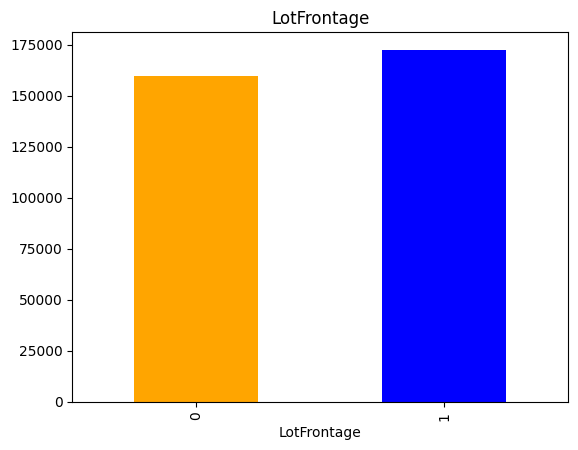

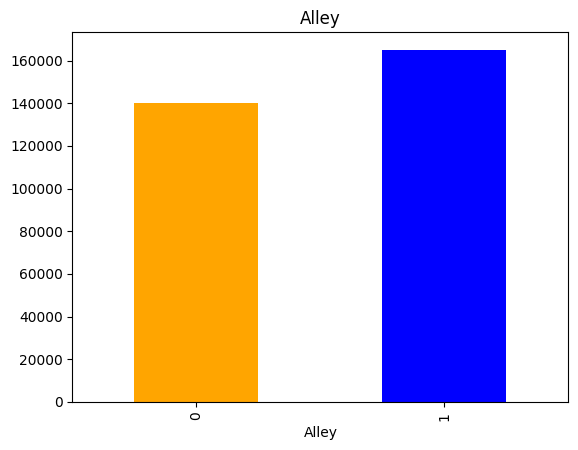

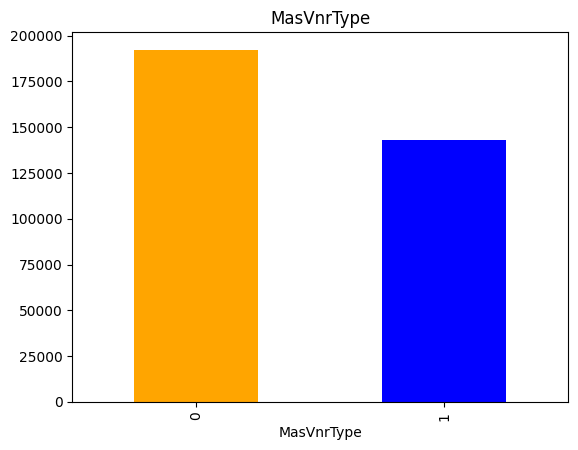

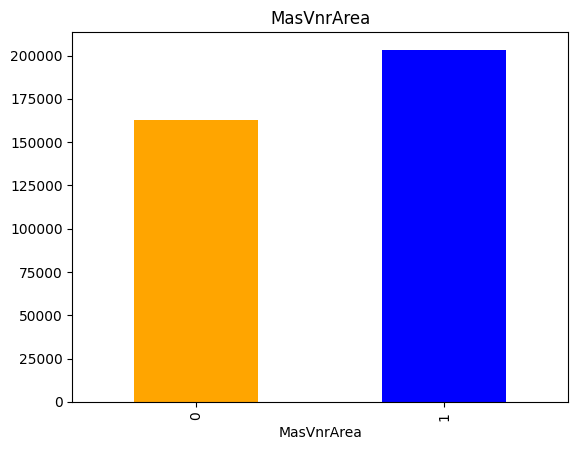

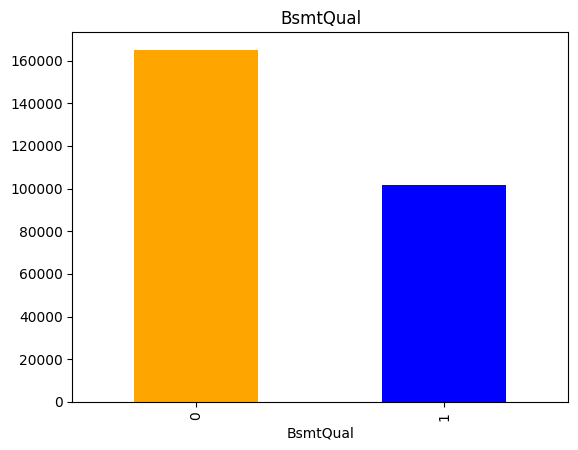

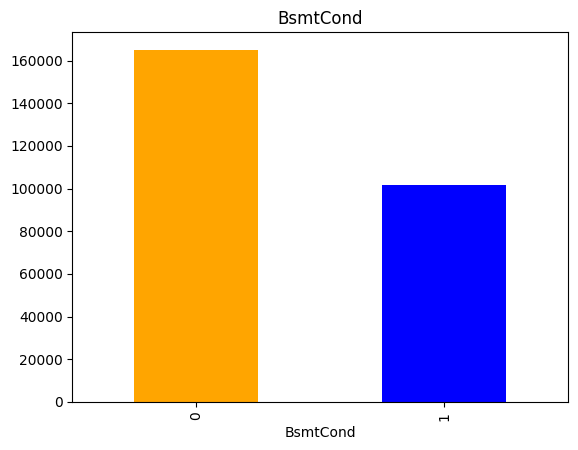

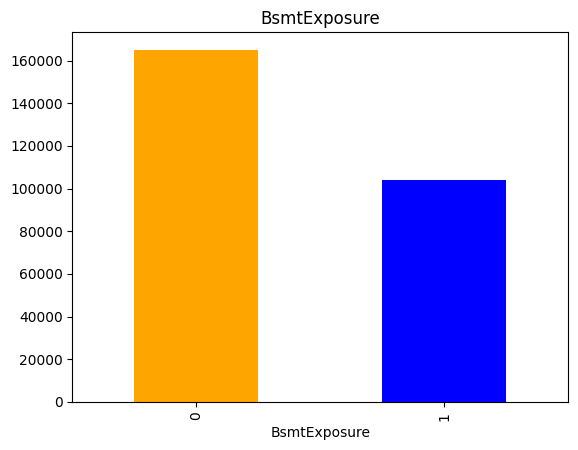

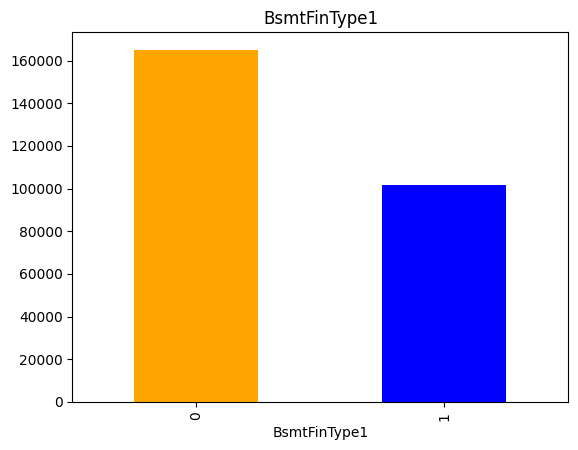

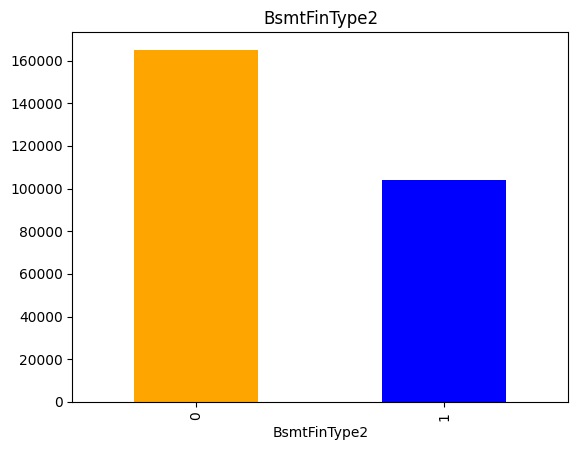

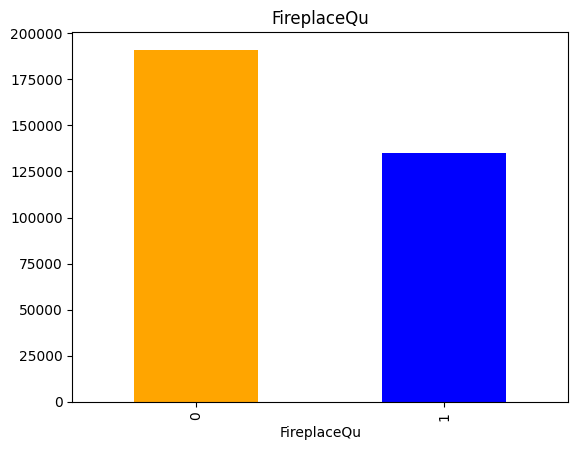

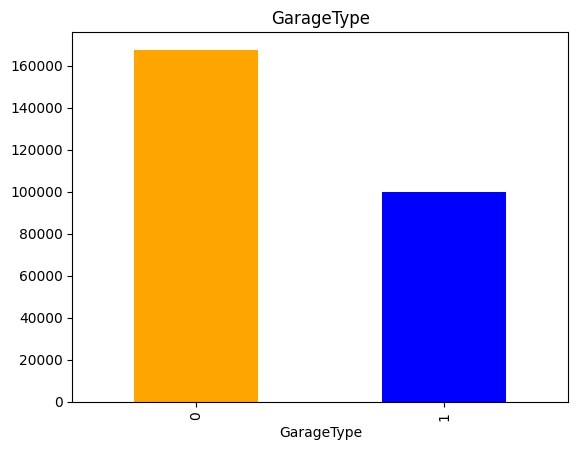

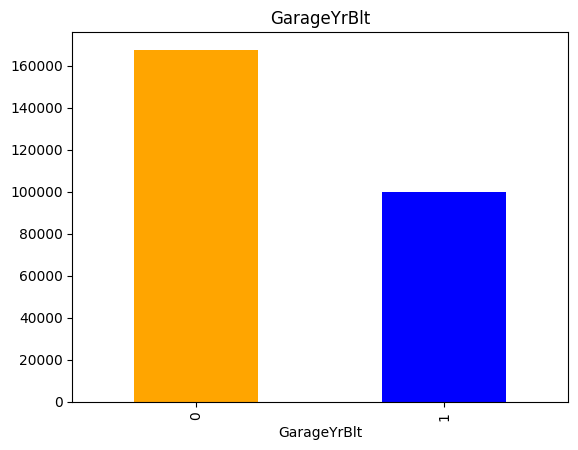

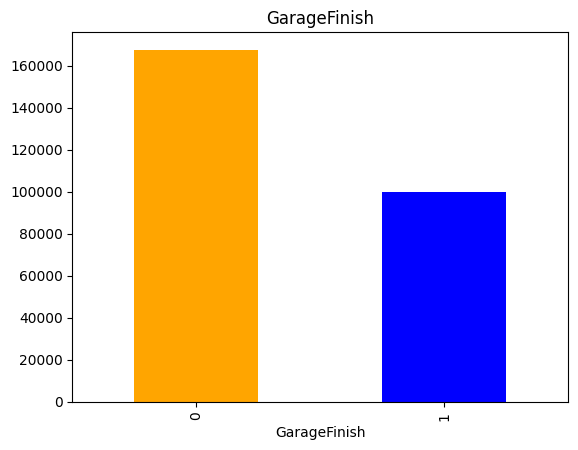

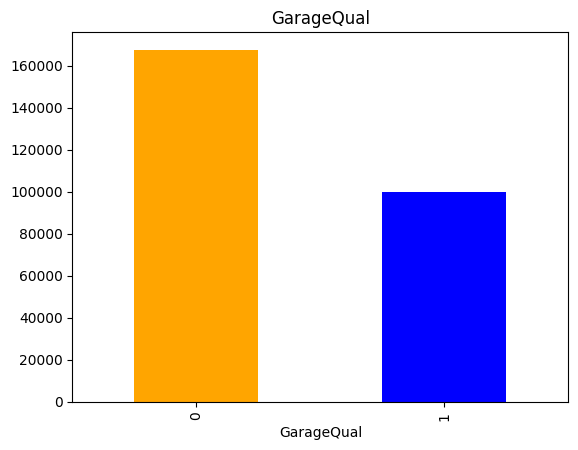

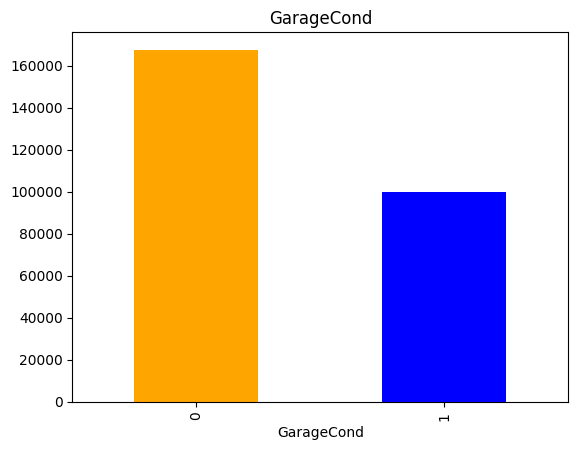

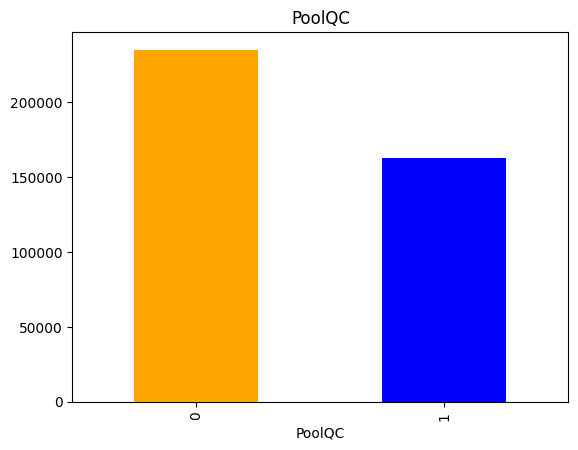

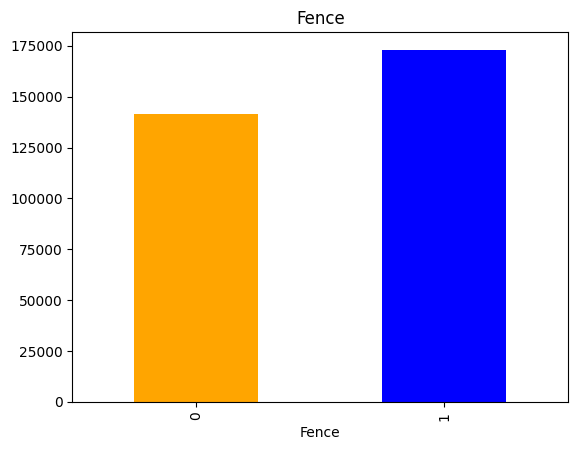

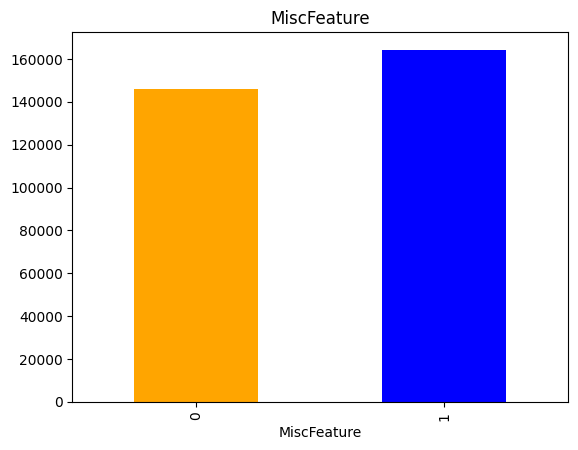

In [122]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar(color=('Orange', 'Blue'))
    plt.title(feature)
    plt.show()

In [123]:
#Check temporal values
temporaldf=[f for f in dataset.columns if 'Yr' in f or 'Year' in f]
temporaldf

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [124]:
#Check for number of numerical values
numerical_features=[f for f in dataset.columns if dataset[f].dtypes!='O']
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [125]:
#Check for unique values in temporal values
for f in temporaldf:
    print(f, dataset[f].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 0, 'Year_Sold')

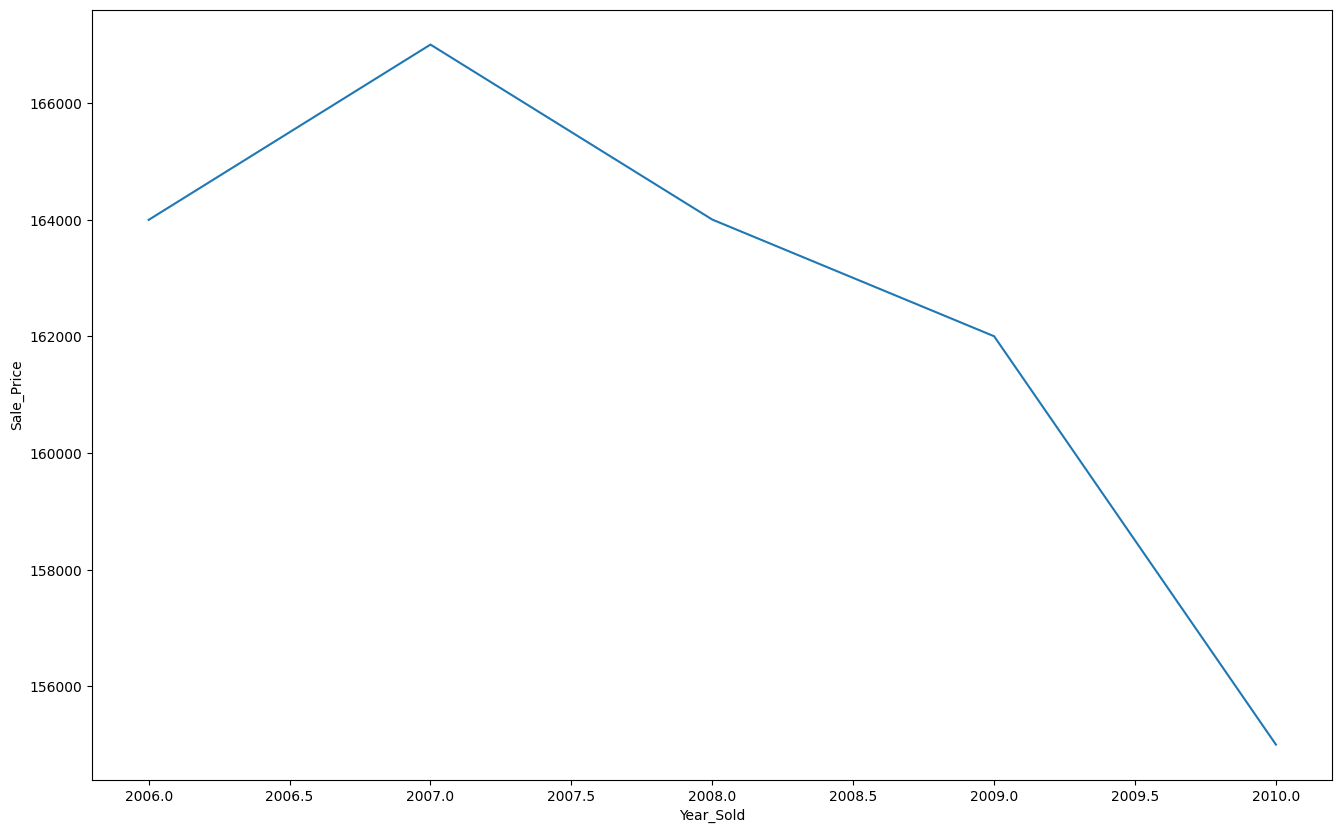

In [126]:
plt.figure(figsize=(16,10))
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Sale_Price')
plt.xlabel('Year_Sold')

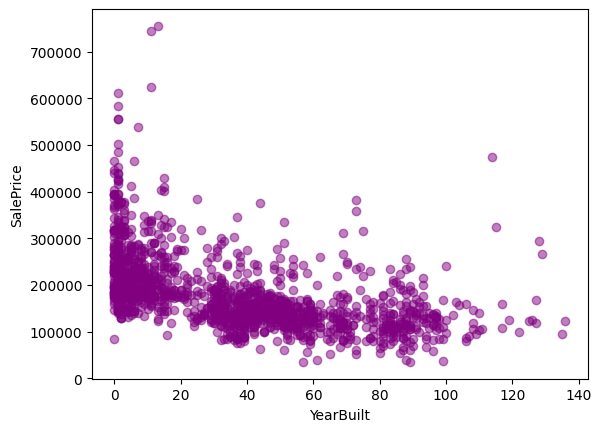

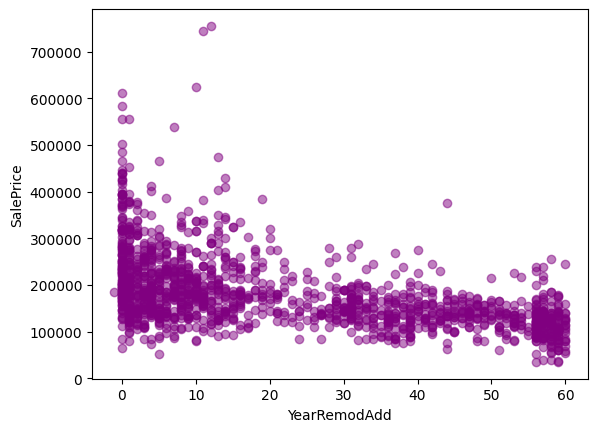

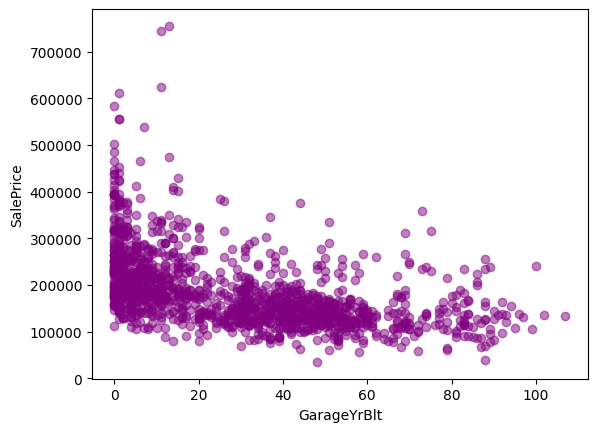

In [127]:
for f in temporaldf:
    if f!='YrSold':
        df1=dataset.copy()
        df1[f]=df1['YrSold']-df1[f]
        plt.scatter(df1[f],df1['SalePrice'], color='Purple', alpha=0.5)
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.show()
    

In [128]:
#Check for types of numerical values: discrete or continuous
discrete_features=[f for f in numerical_features if len(dataset[f].unique())<25 and f not in temporaldf+['ID']]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [129]:
dataset[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

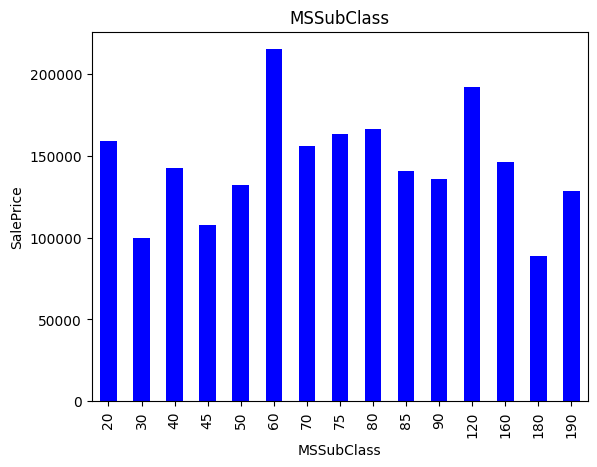

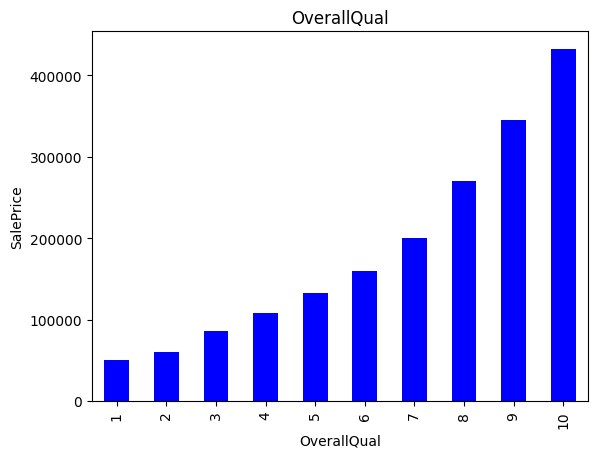

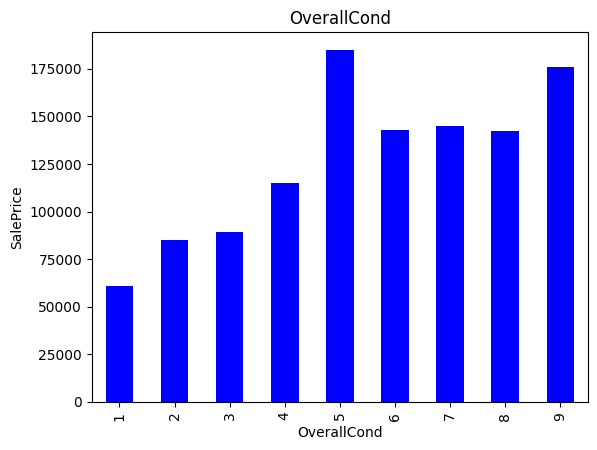

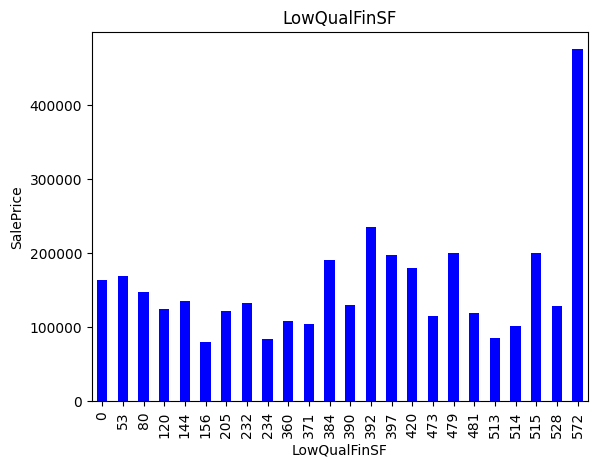

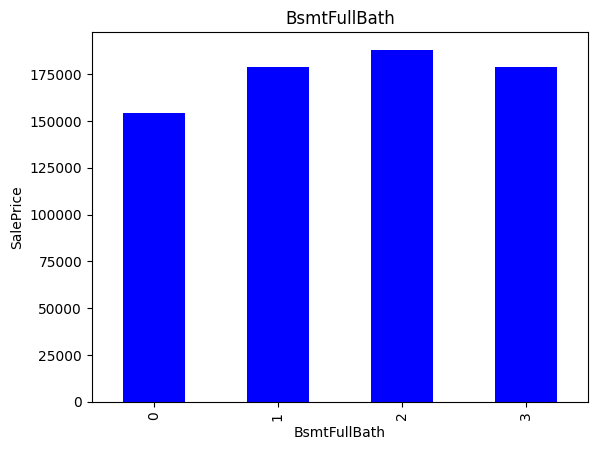

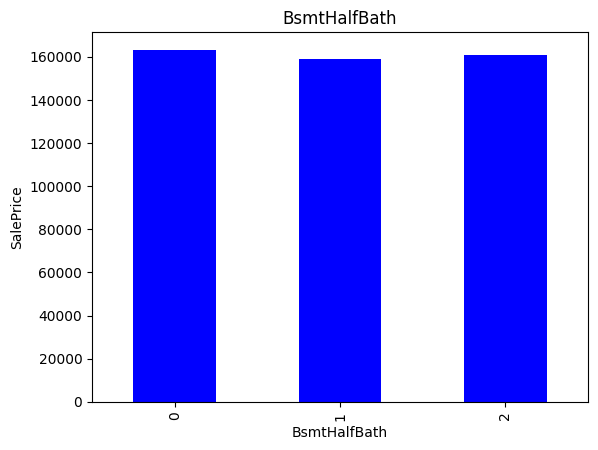

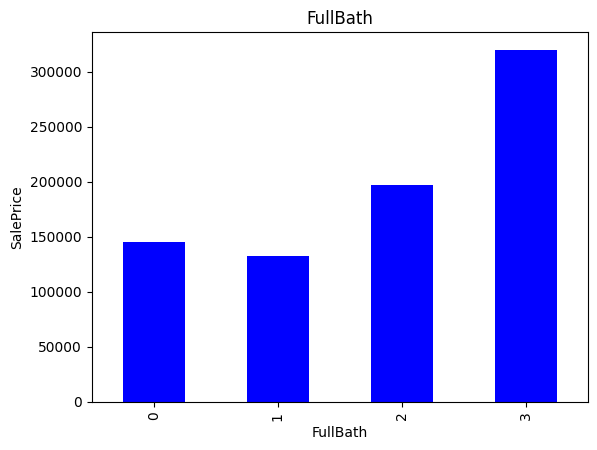

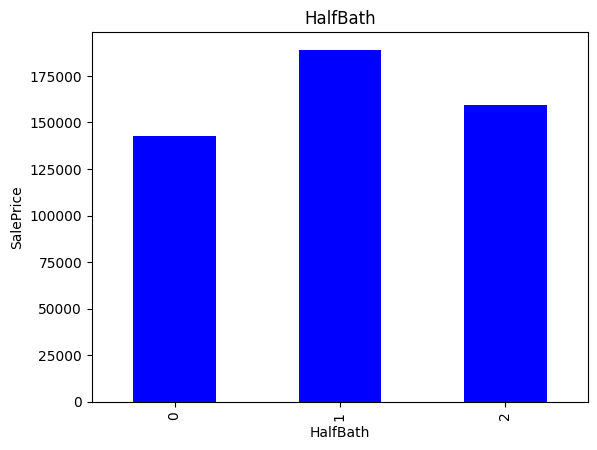

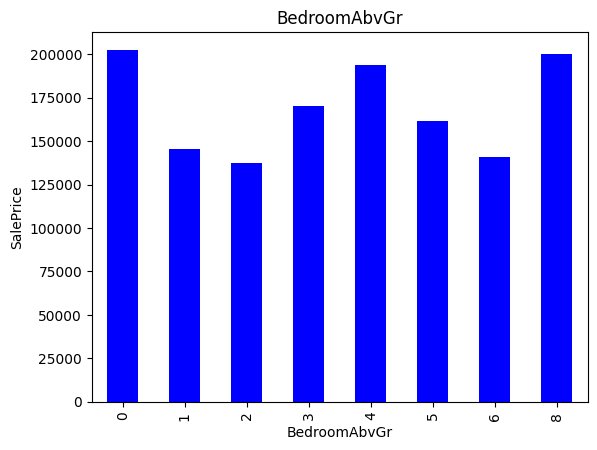

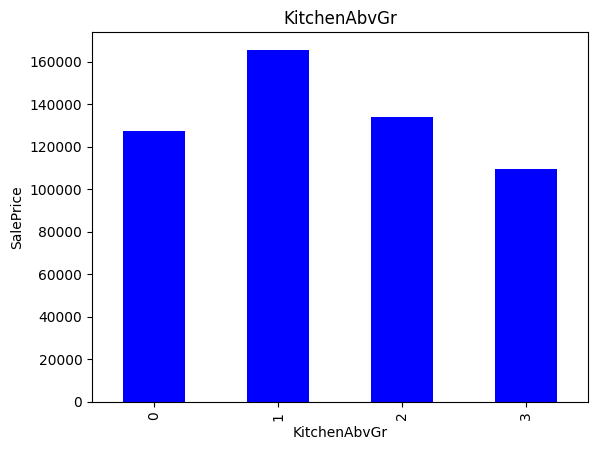

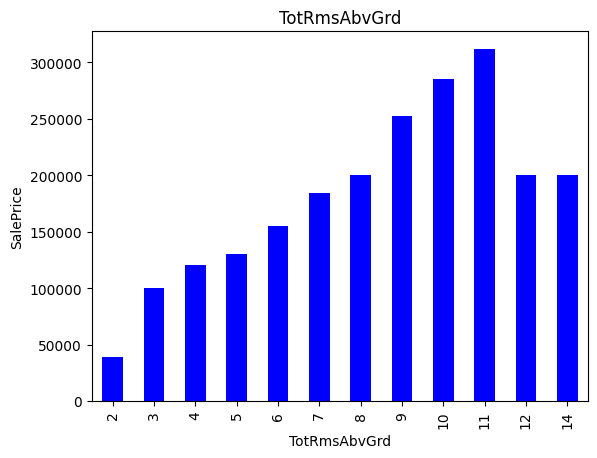

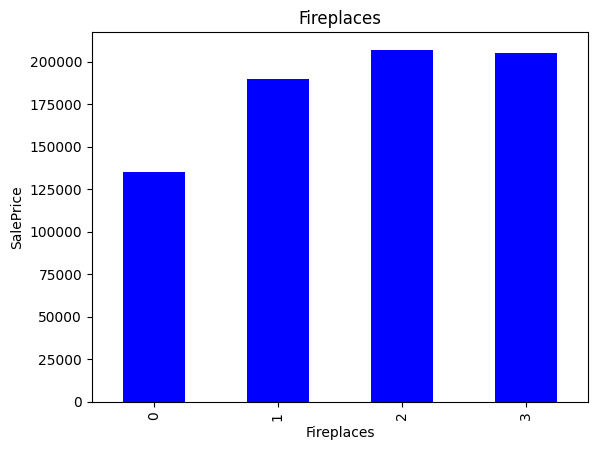

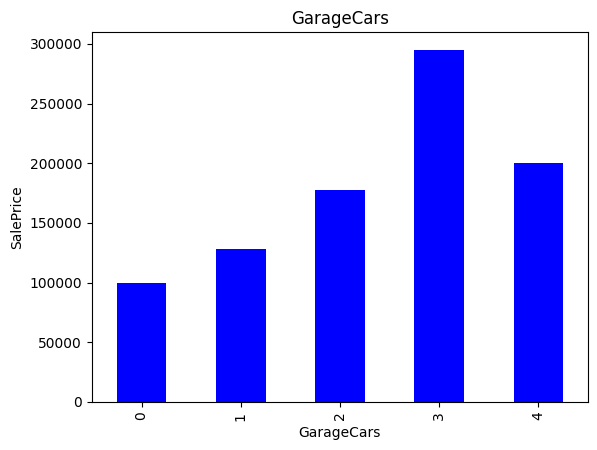

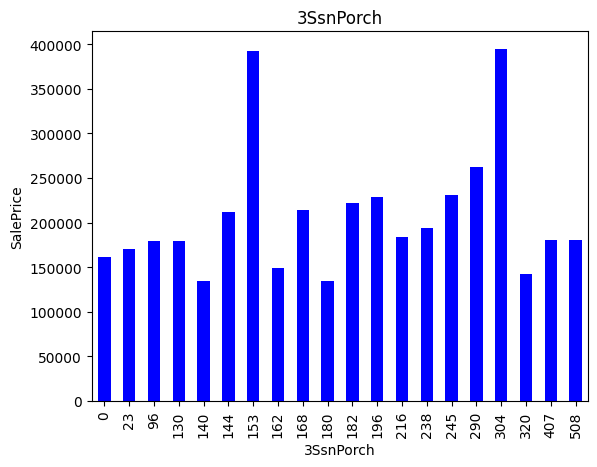

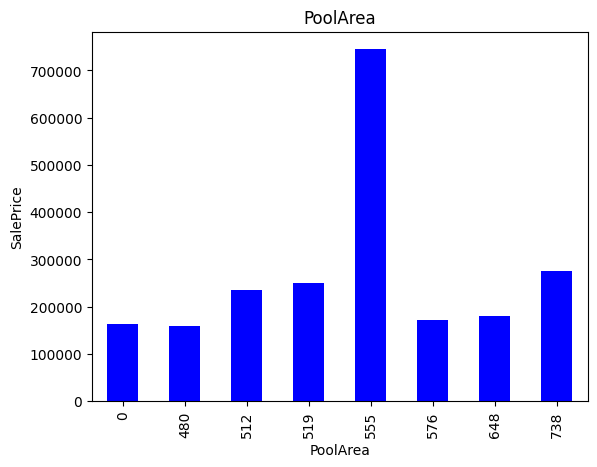

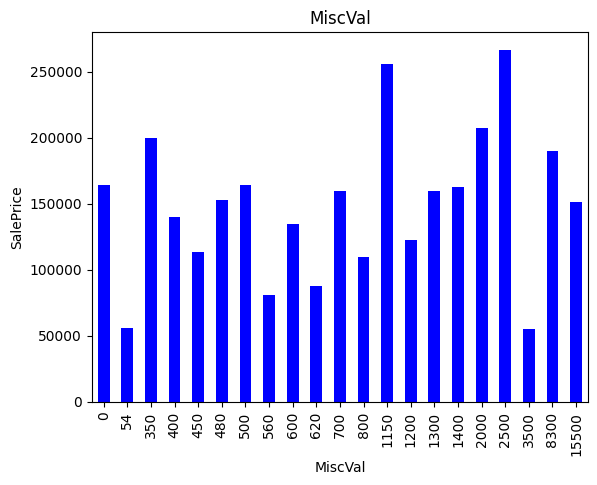

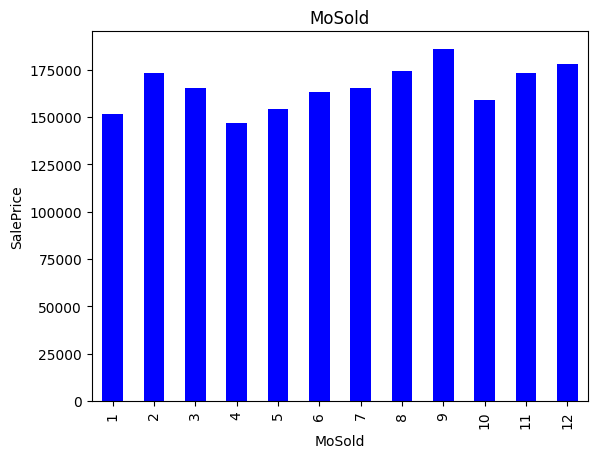

In [130]:
#Relationship between discrete features and saleprice
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=('Blue'))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

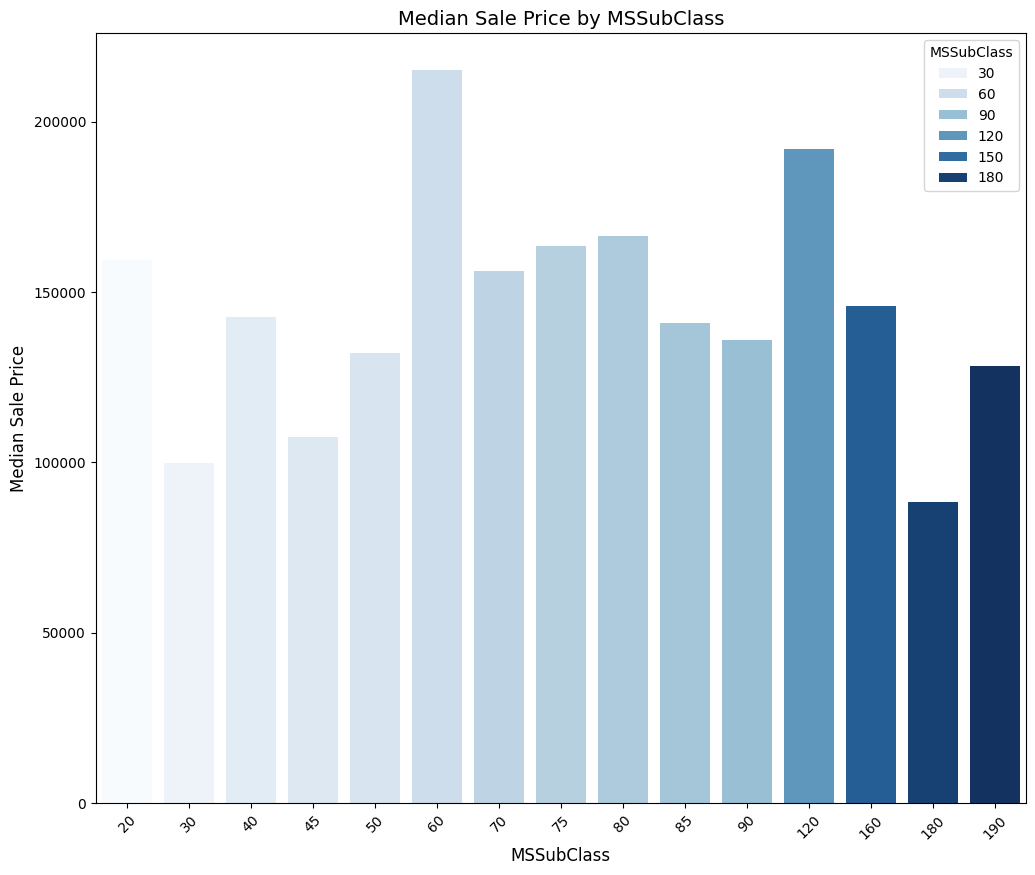

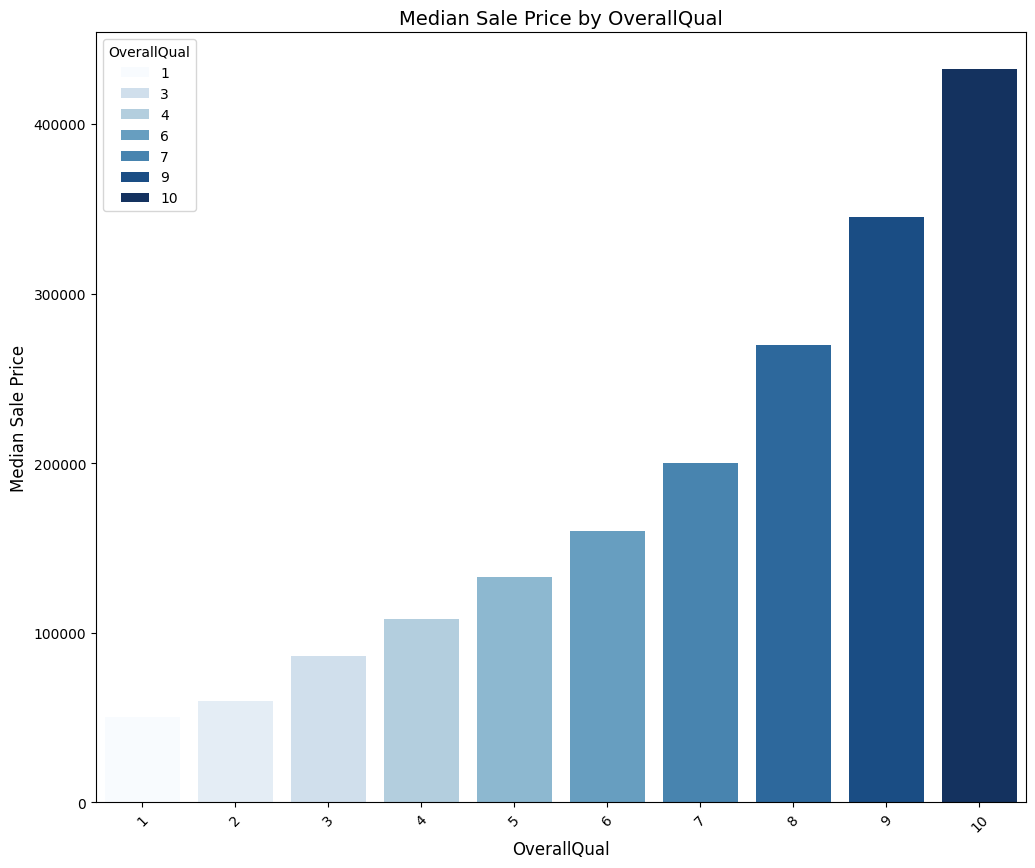

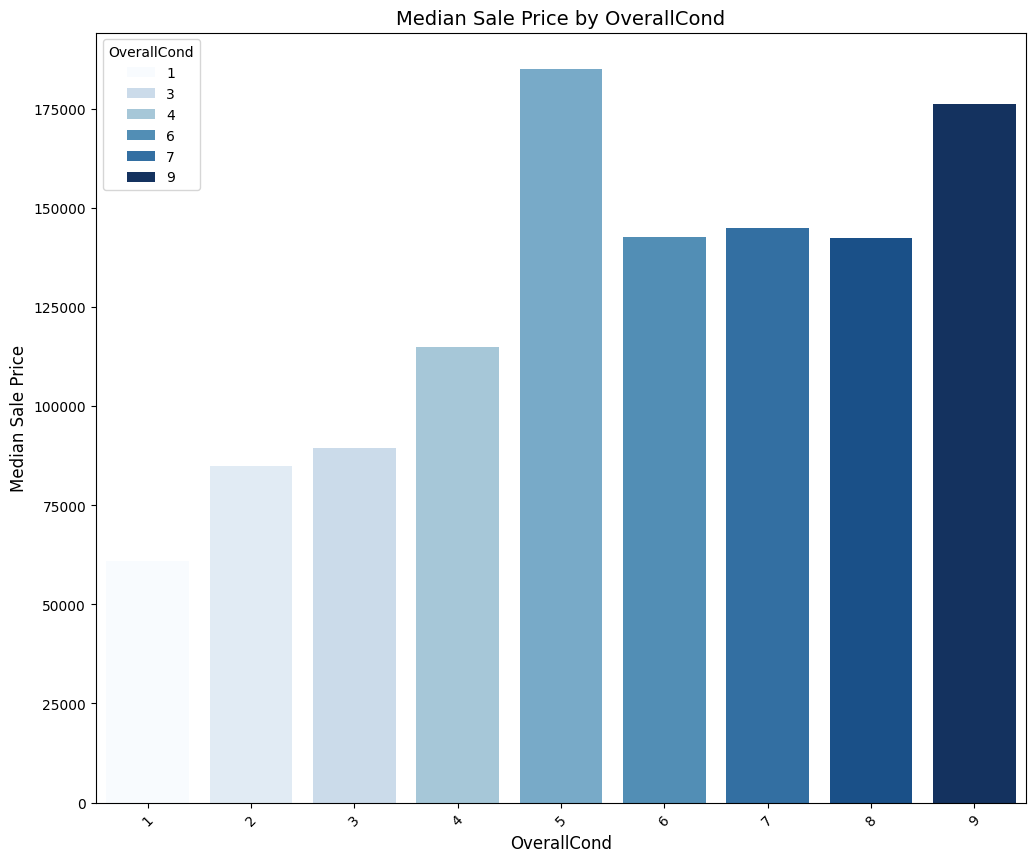

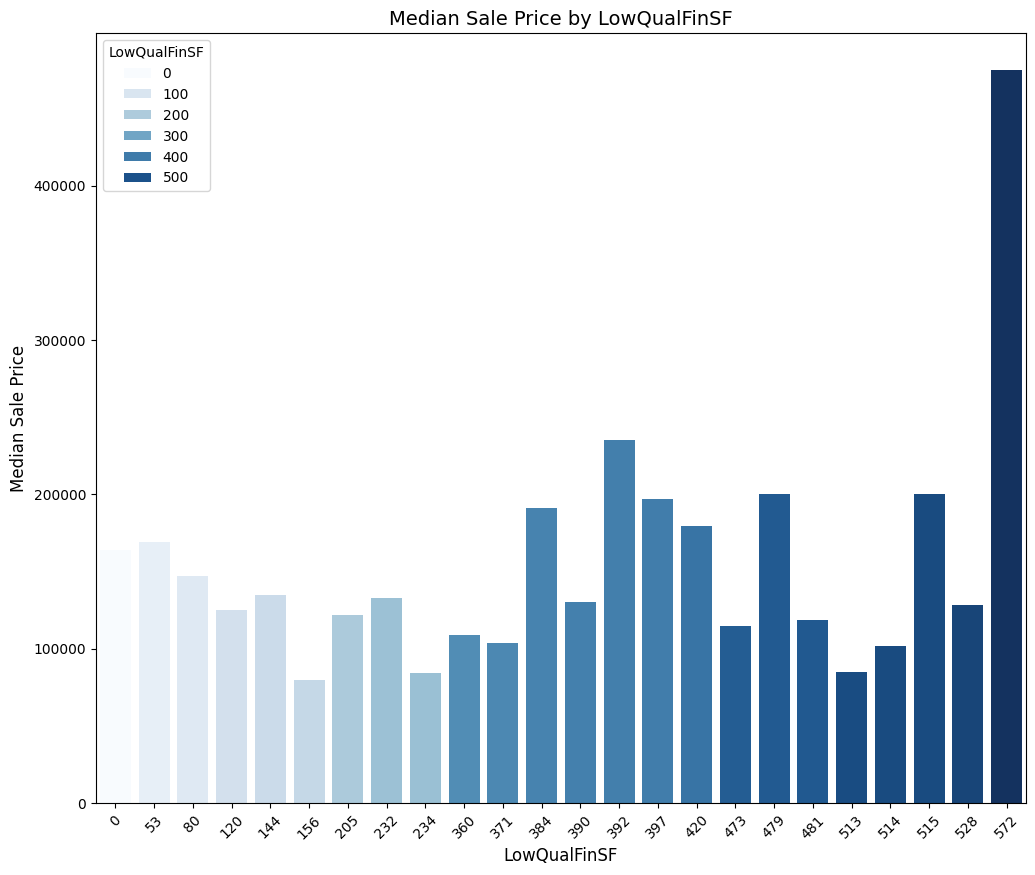

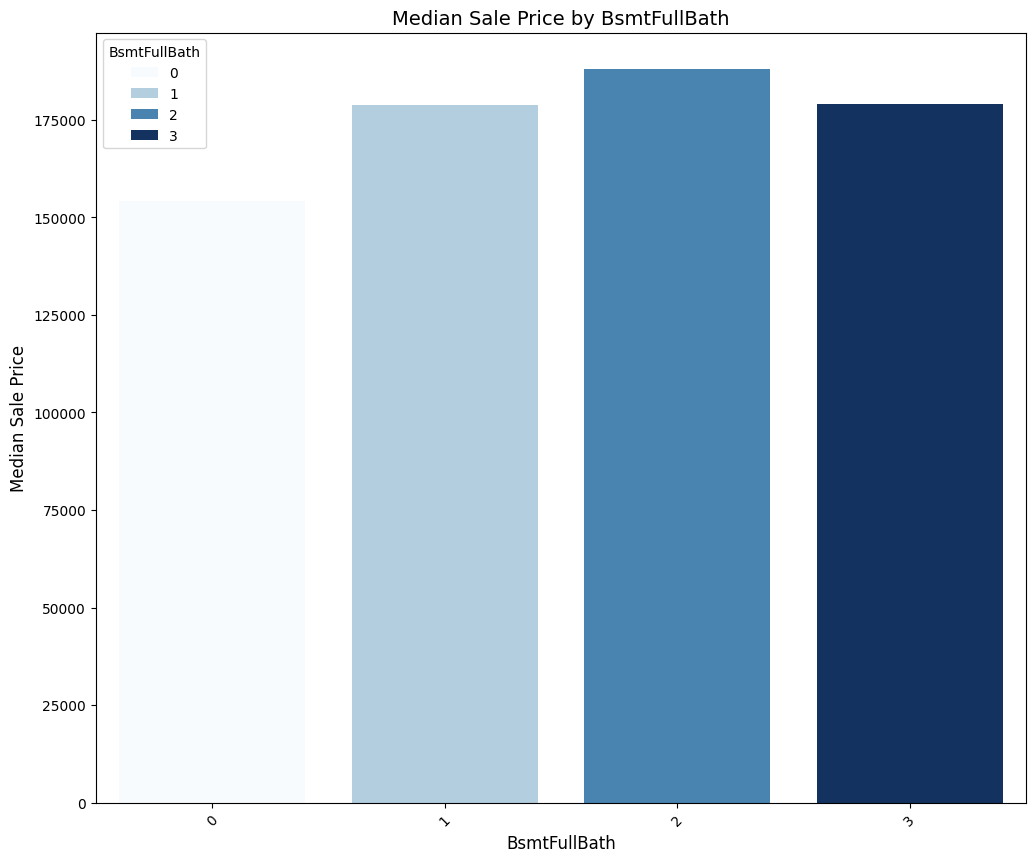

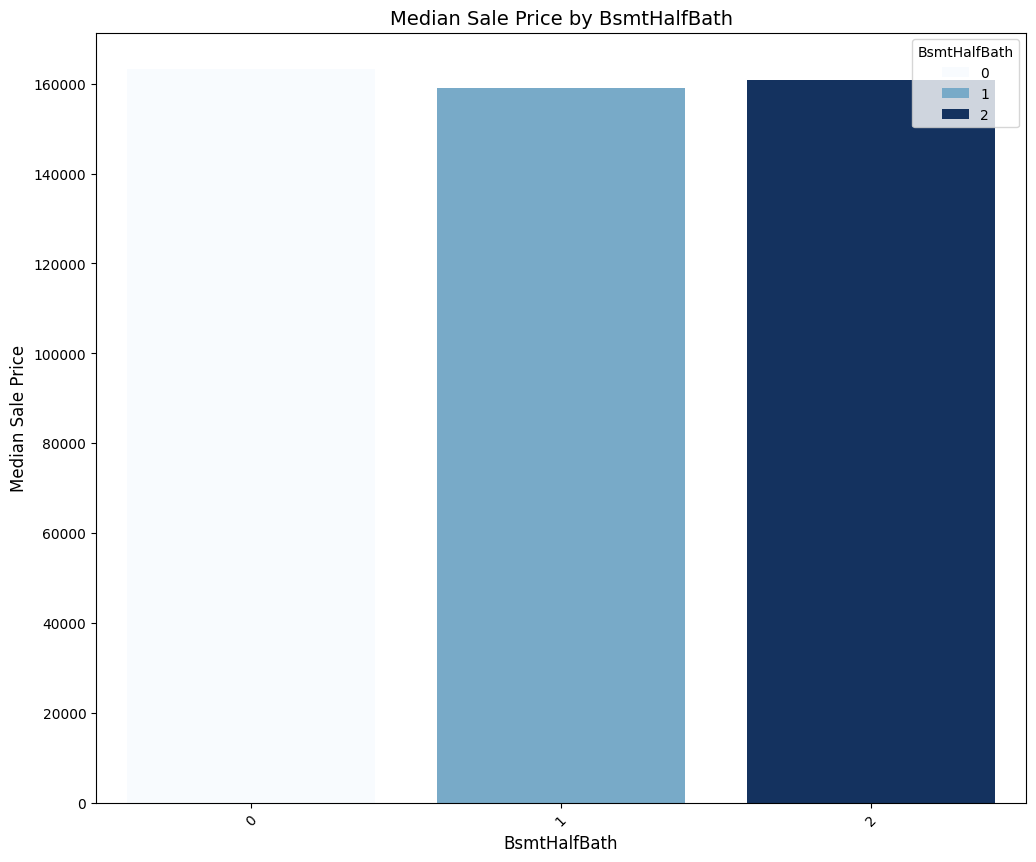

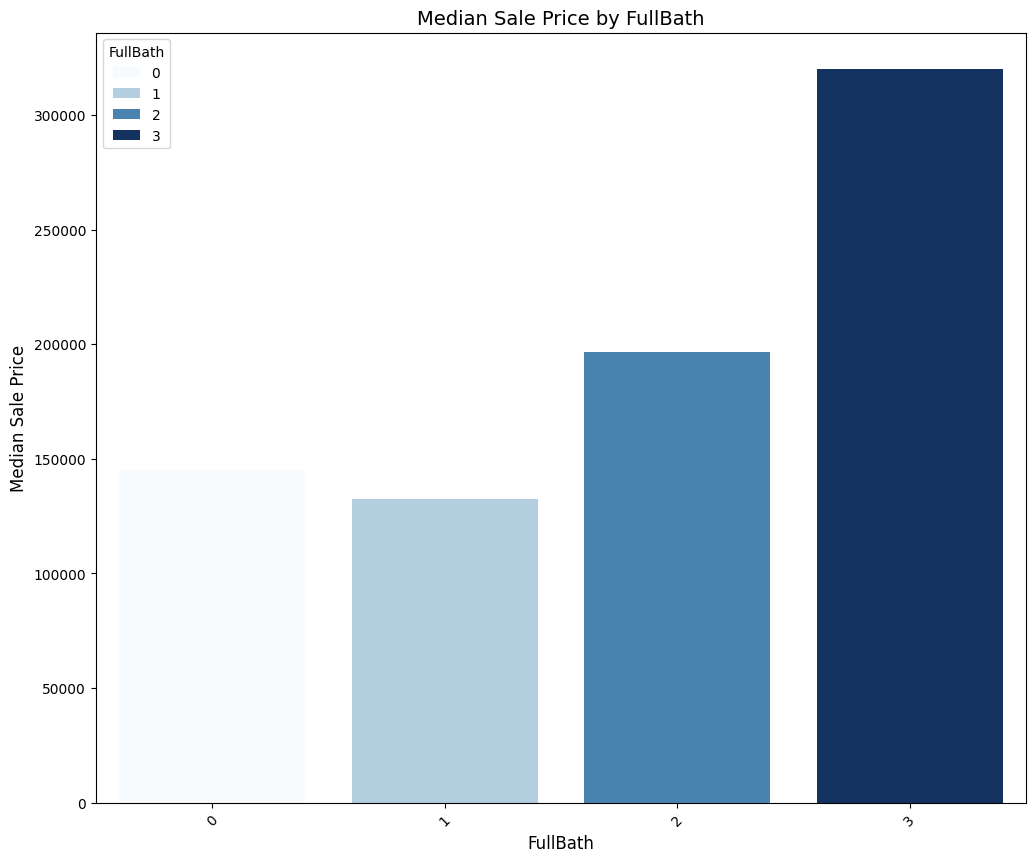

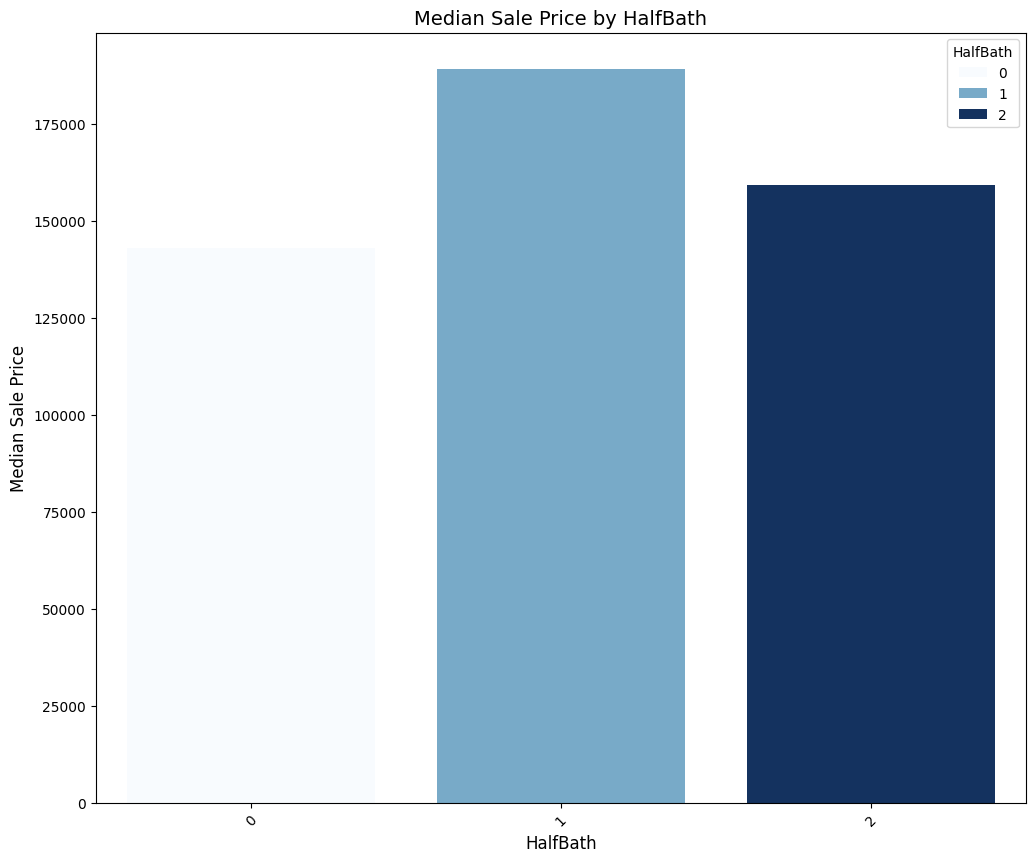

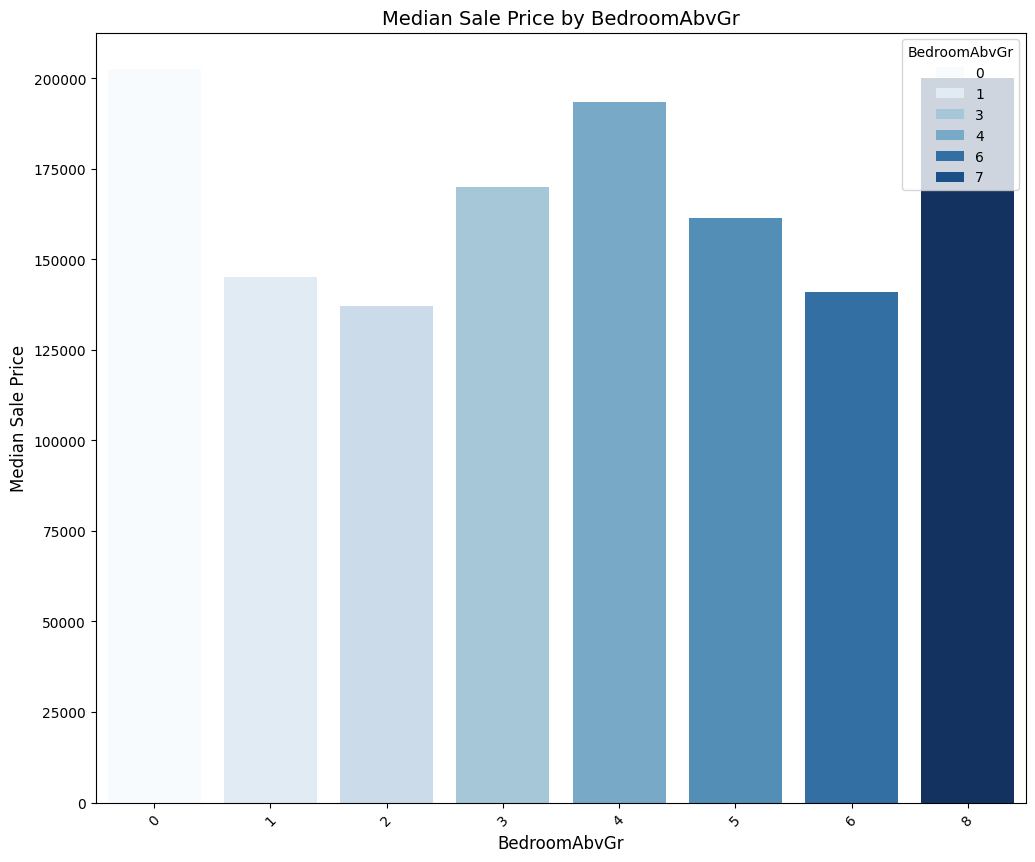

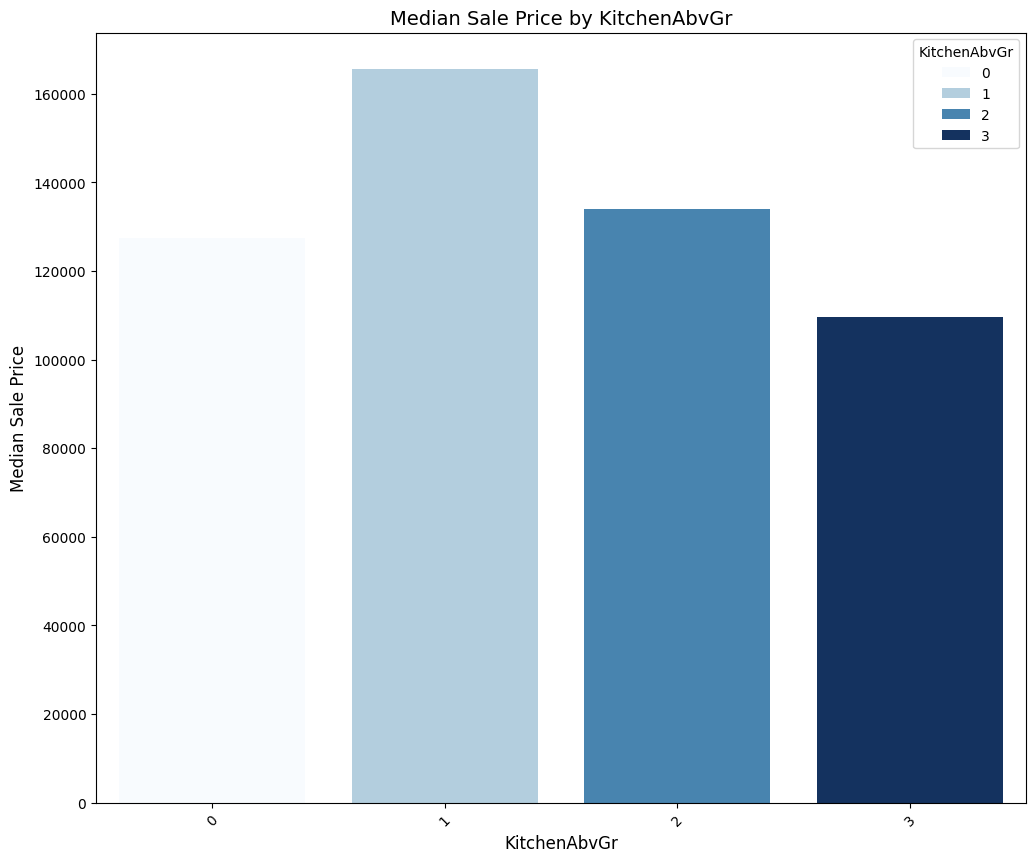

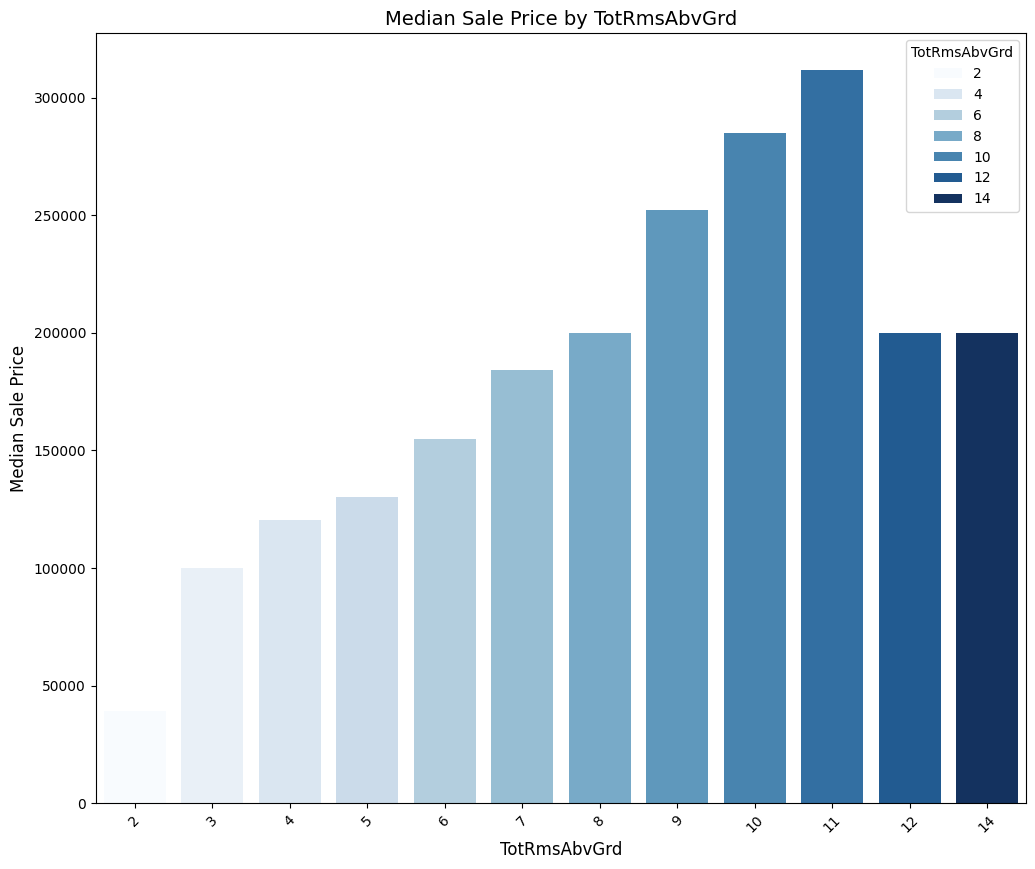

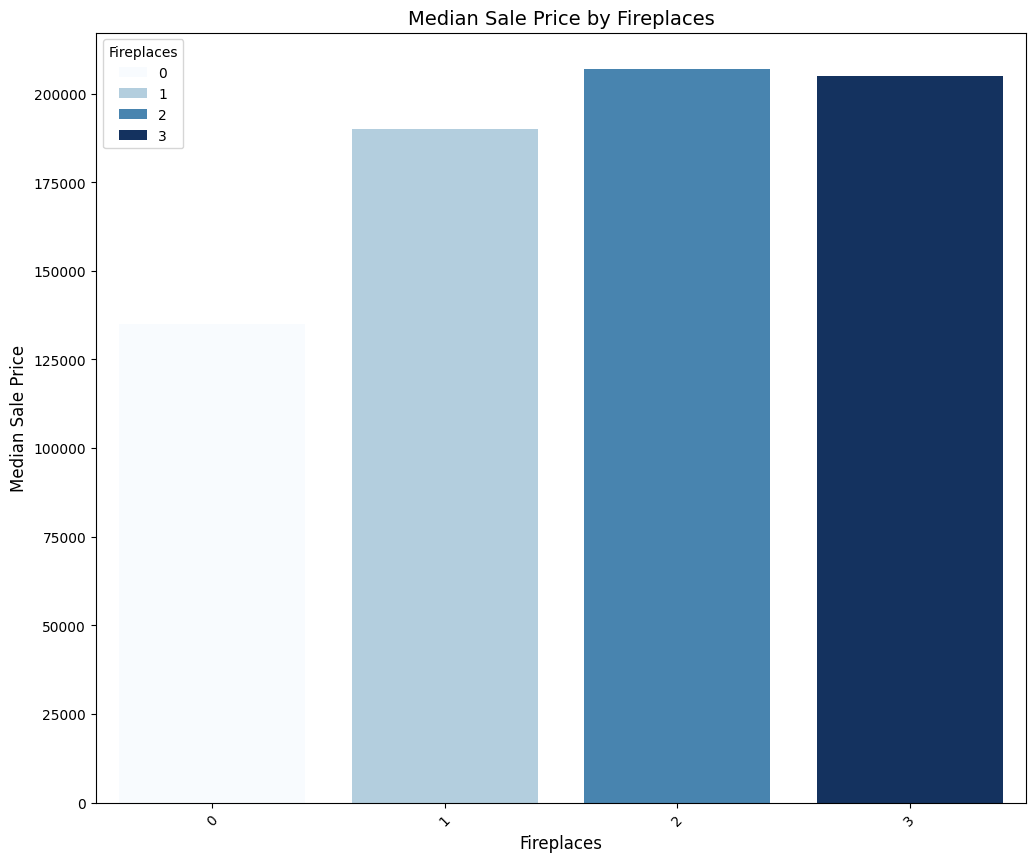

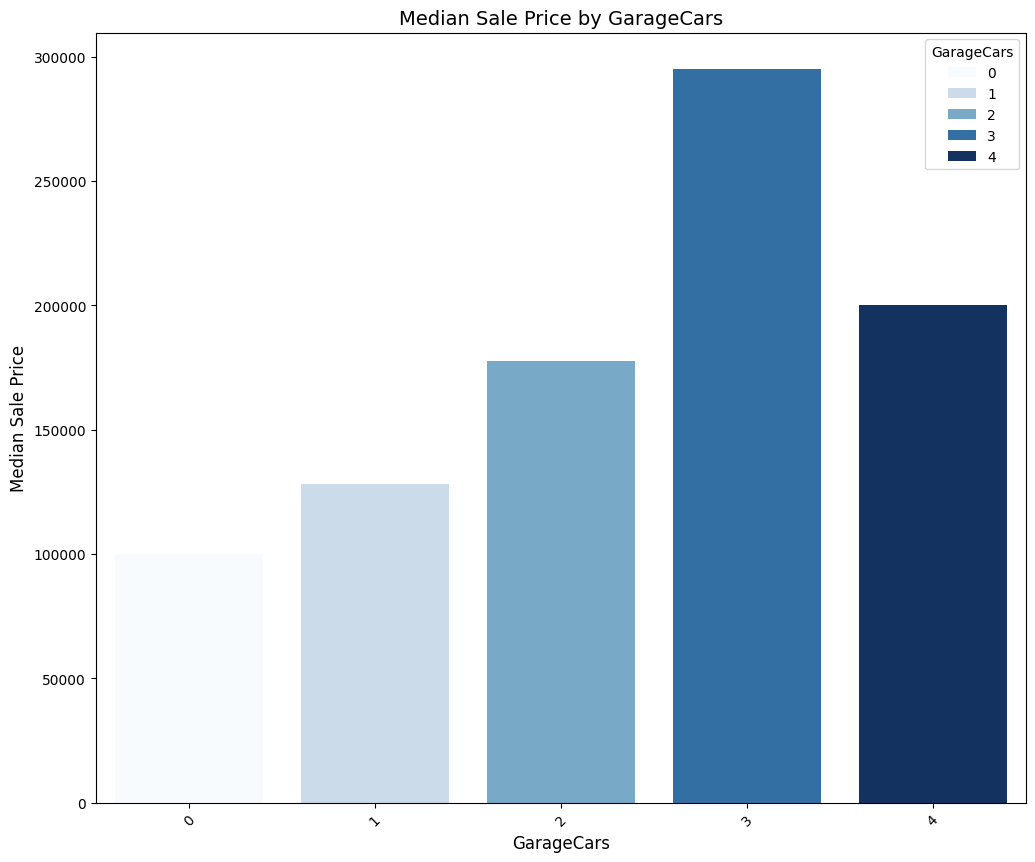

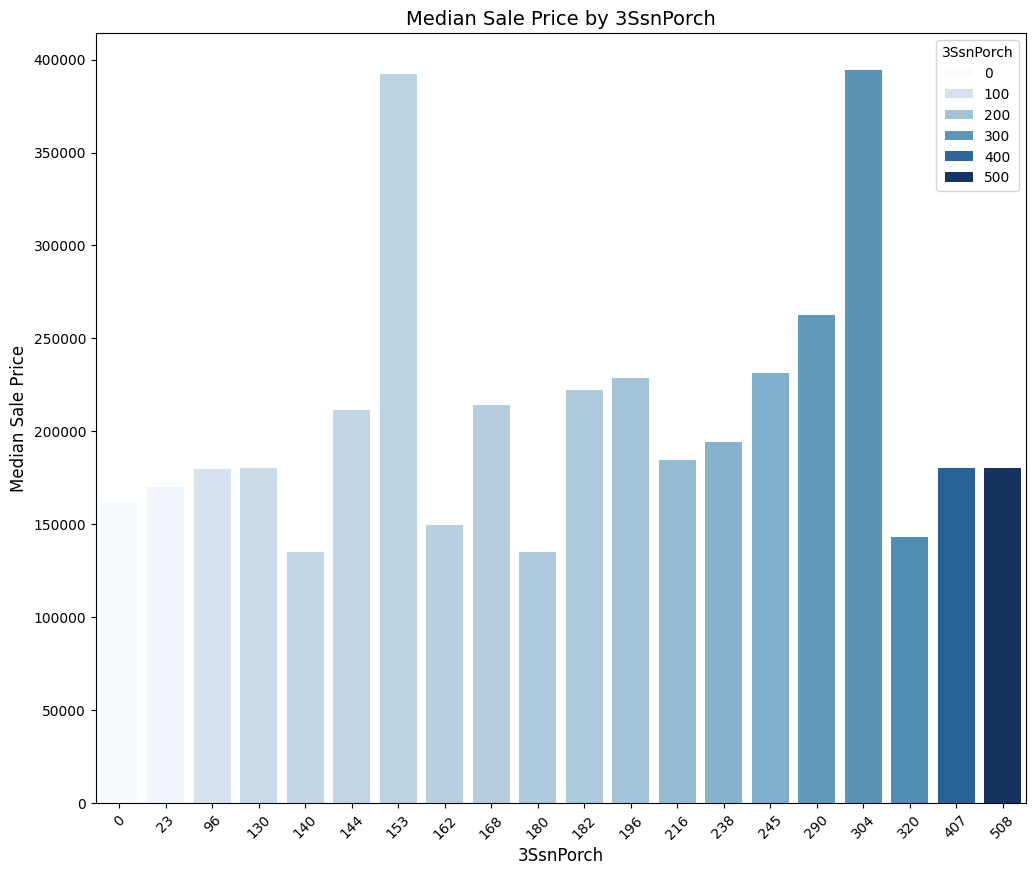

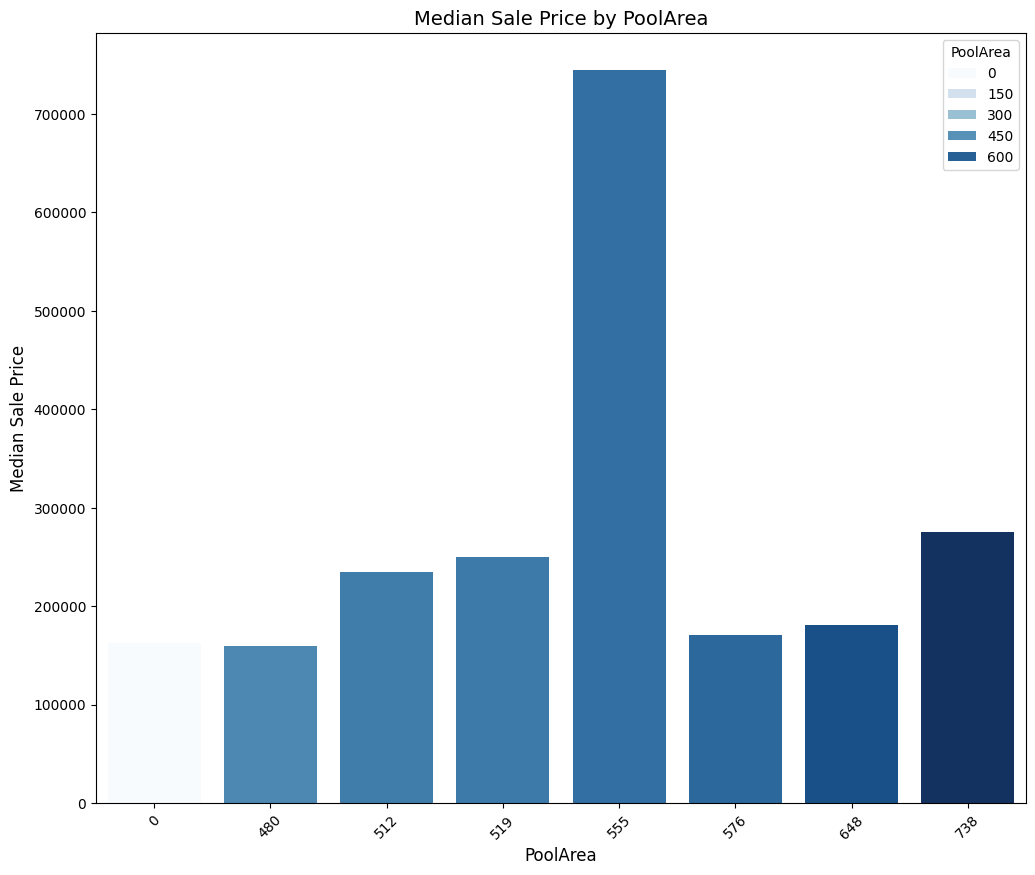

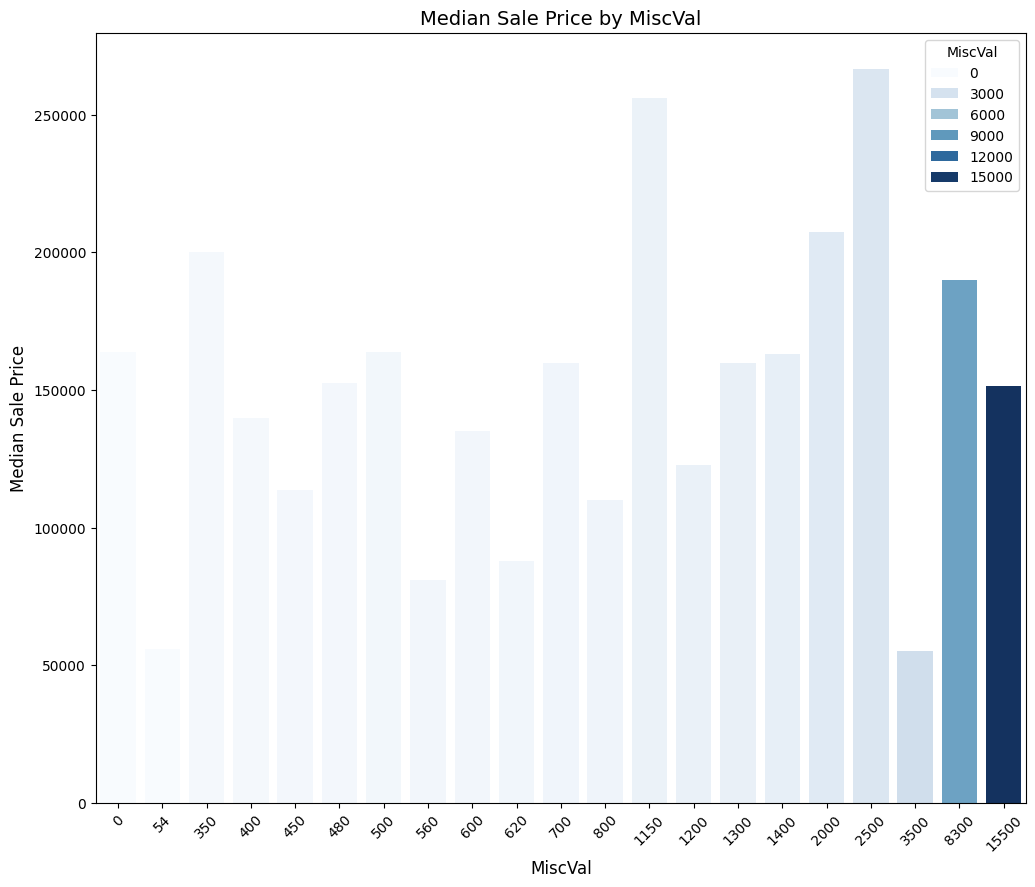

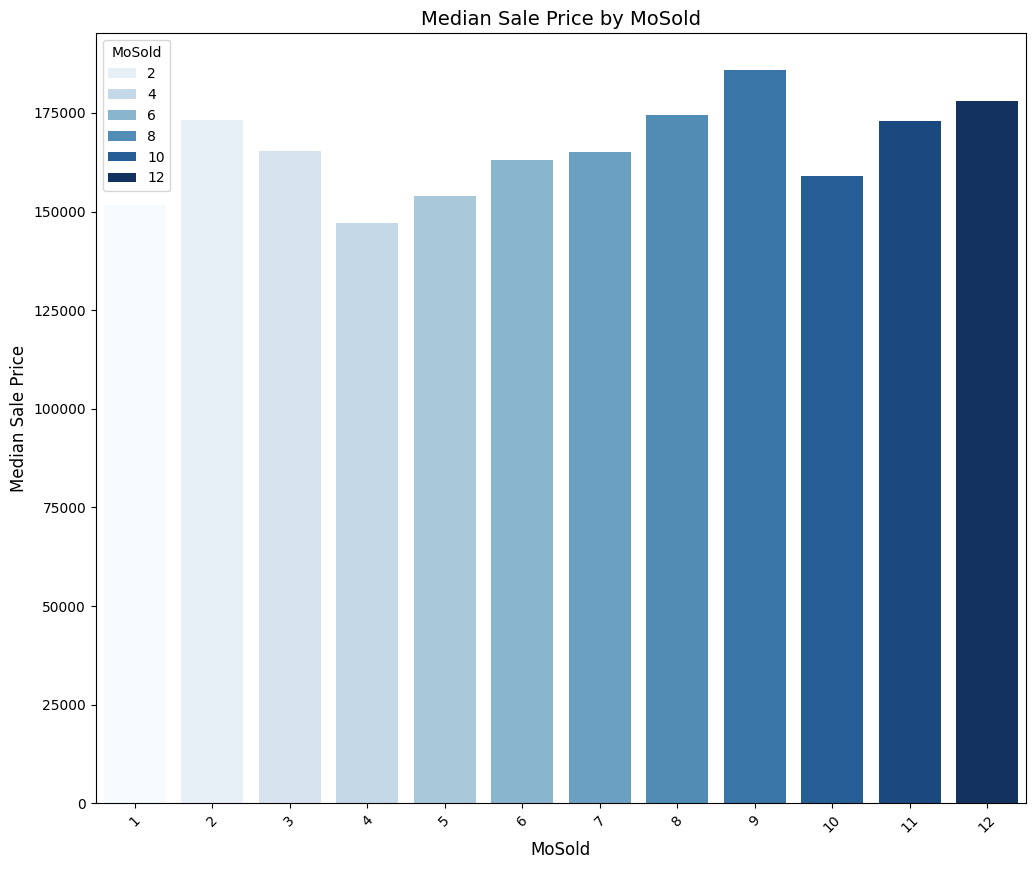

In [131]:
# Group data and calculate median SalePrice for the each discrete feature
for feature in discrete_features:
    median_prices = data.groupby(feature)['SalePrice'].median().reset_index()
    plt.figure(figsize=(12,10))
    # Plot using Seaborn to apply the 'viridis' palette
    sns.barplot(x=feature, y='SalePrice', data=median_prices, hue=feature, palette='Blues')

    # Add labels and title
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Median Sale Price', fontsize=12)
    plt.title(f'Median Sale Price by {feature}', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed 
    plt.show()



In [132]:
#Continuous features
continuous_features=[f for f in numerical_features if f not in discrete_features+temporaldf+['Id']]
continuous_features
                

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

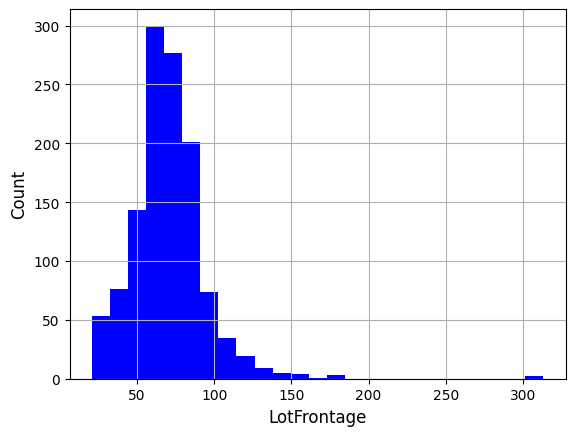

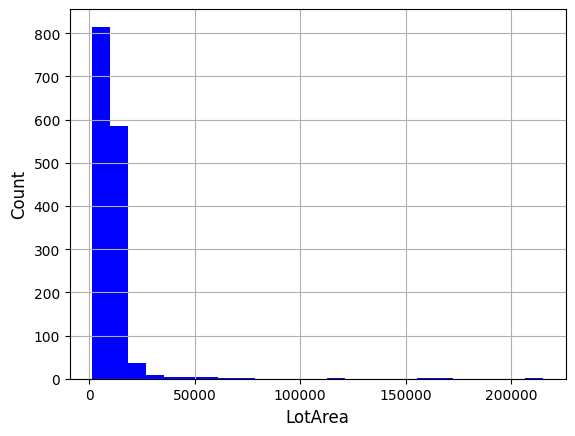

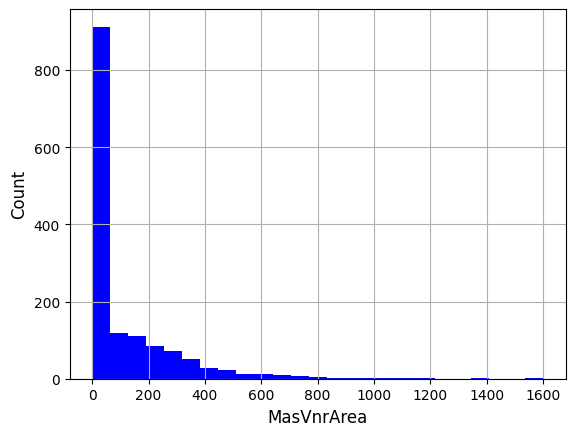

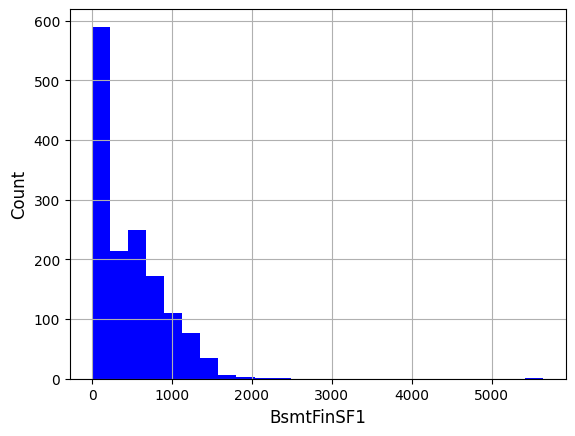

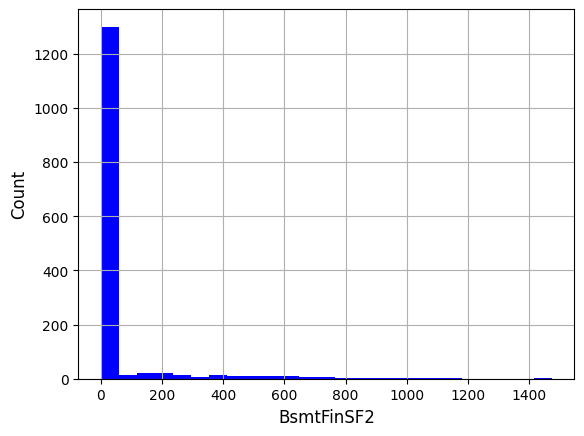

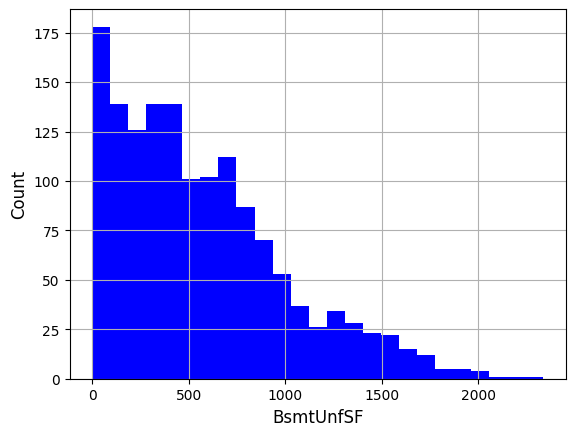

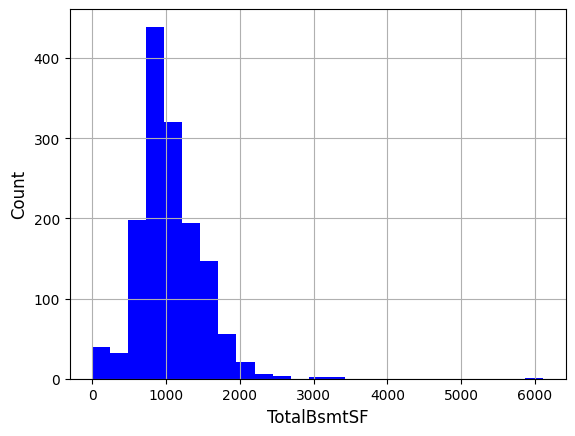

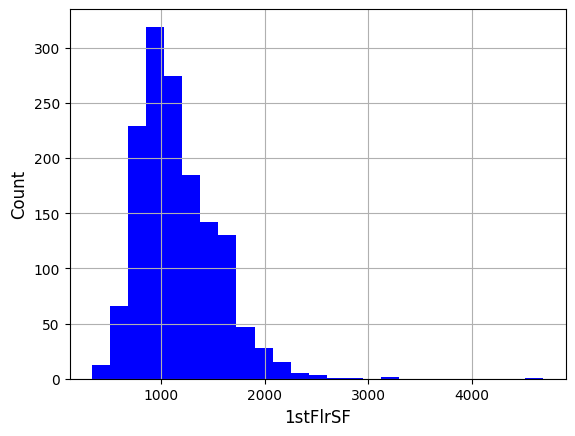

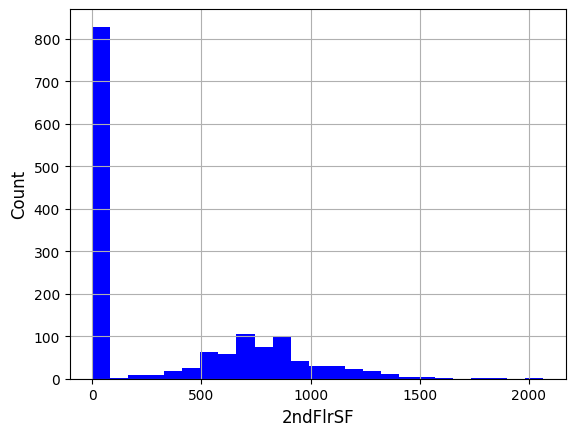

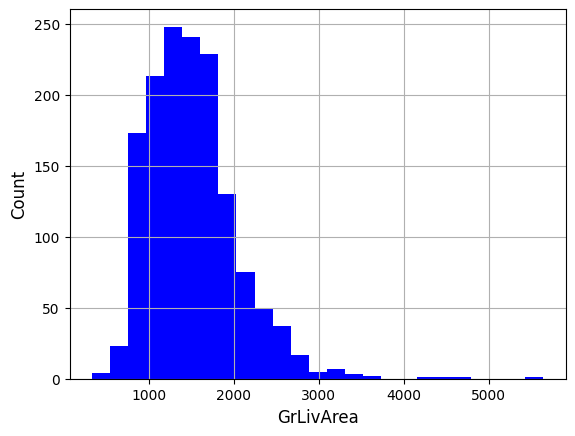

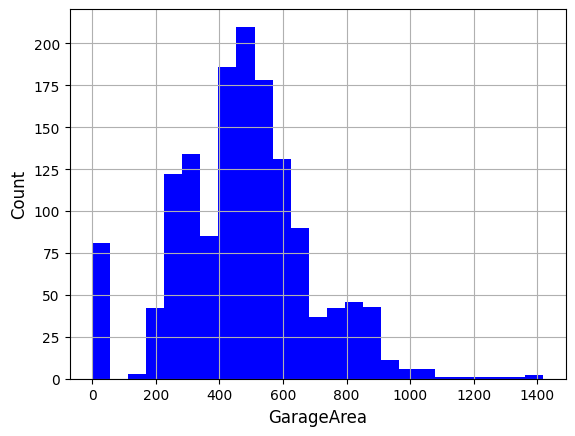

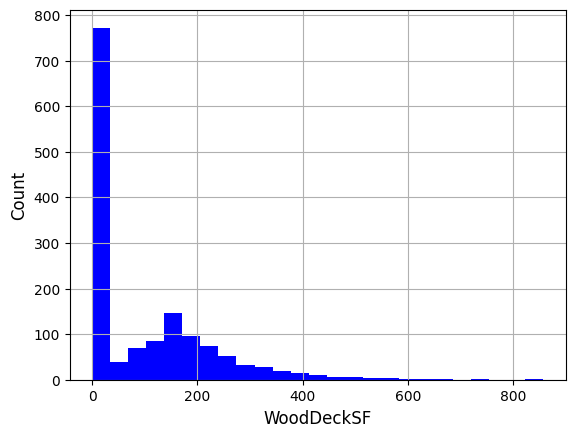

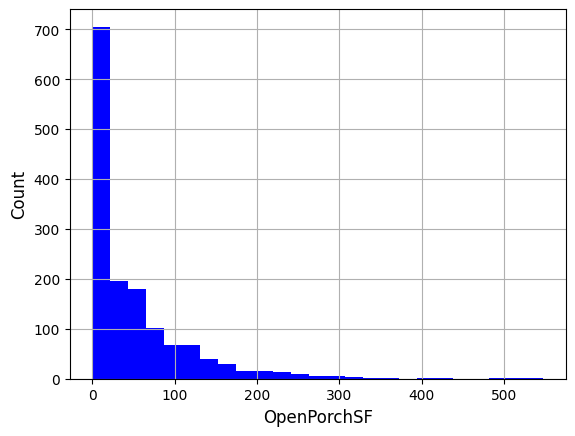

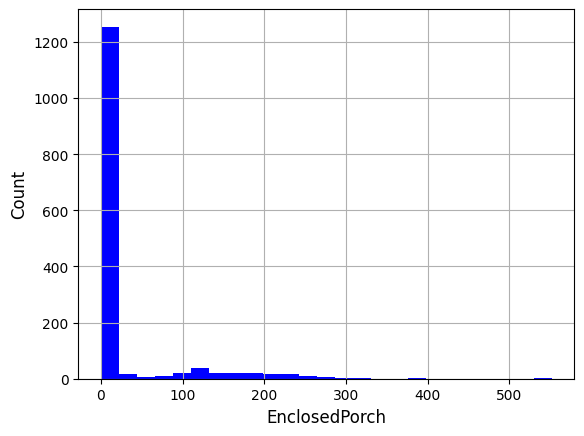

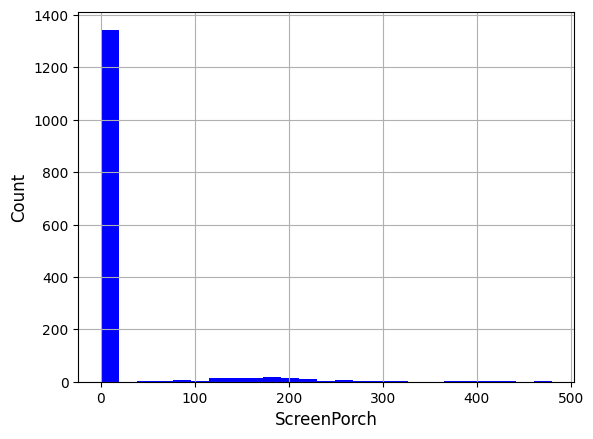

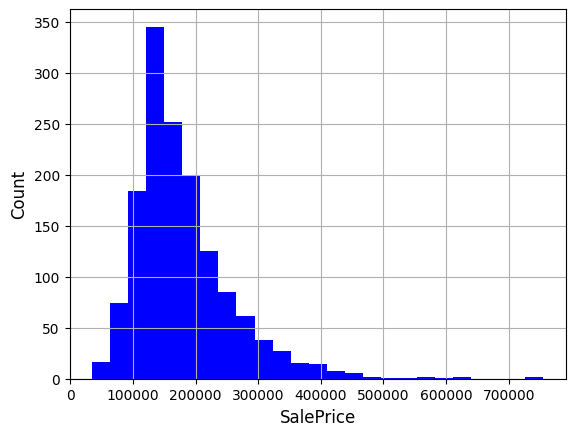

In [133]:
#Lets analyse continuous features
for f in continuous_features:
    df=dataset.copy()
    df[f].hist(bins=25, color=('Blue'))
    plt.xlabel(f, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

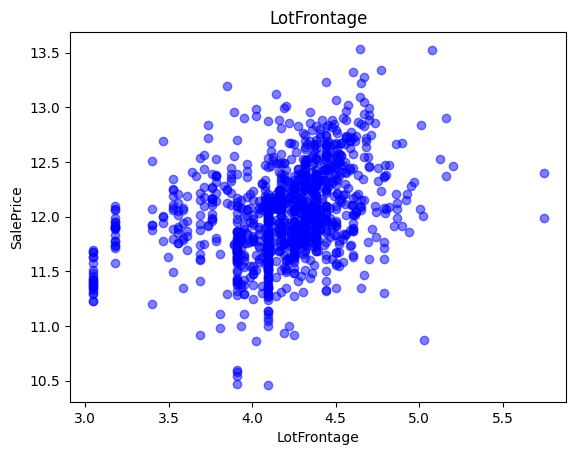

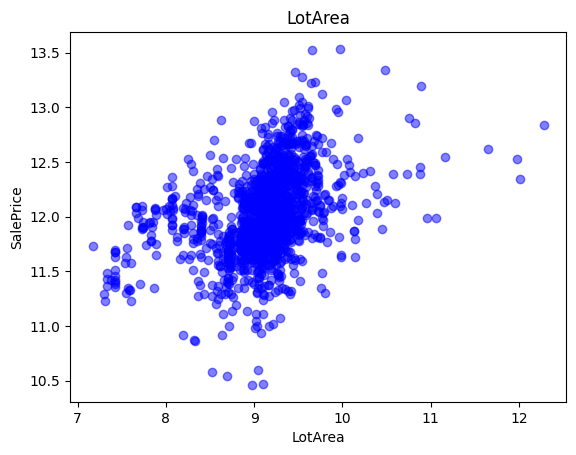

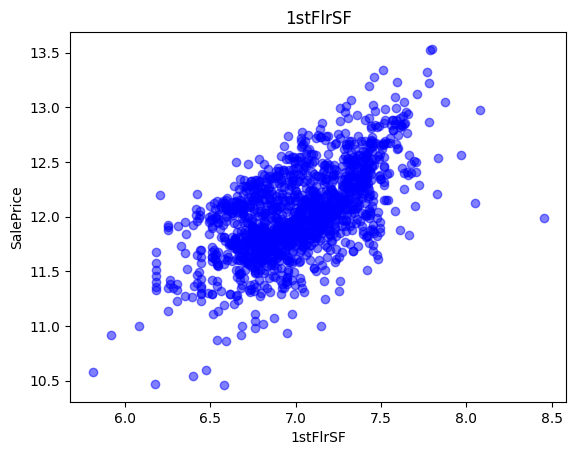

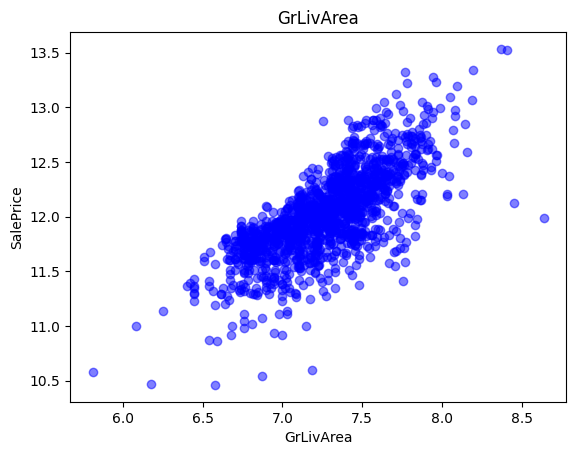

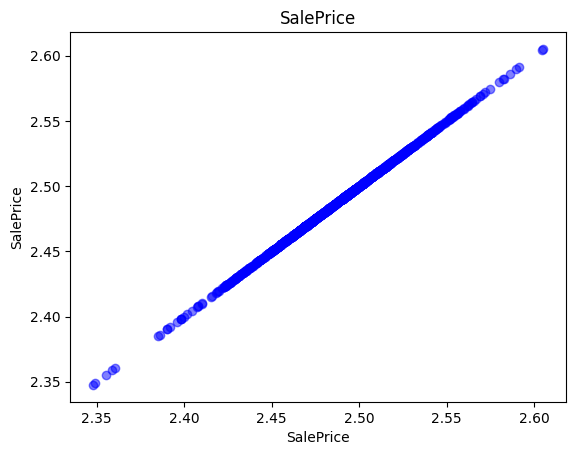

In [134]:
#Use Logarithmic transformations for further analysis
#log normal distribution
for f in continuous_features:
    data=dataset.copy()
    if 0 in data[f].unique():
        pass
    else:
        data[f]=np.log(data[f])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[f], data['SalePrice'], color='Blue', alpha=0.5)
        plt.title(f)
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.show()

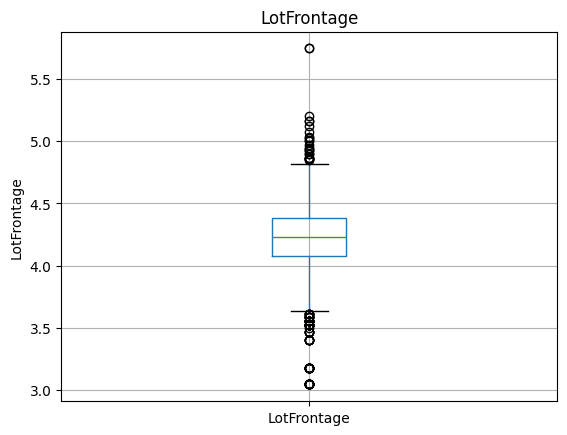

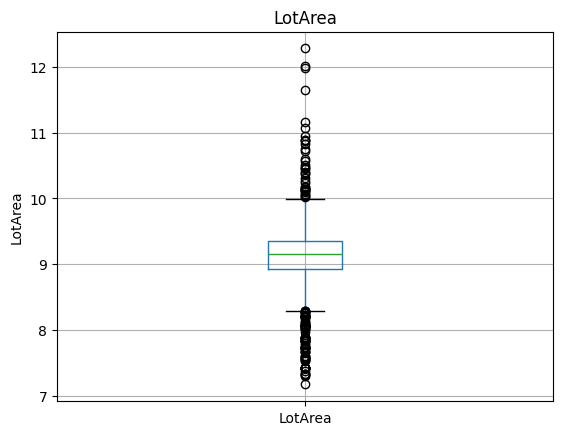

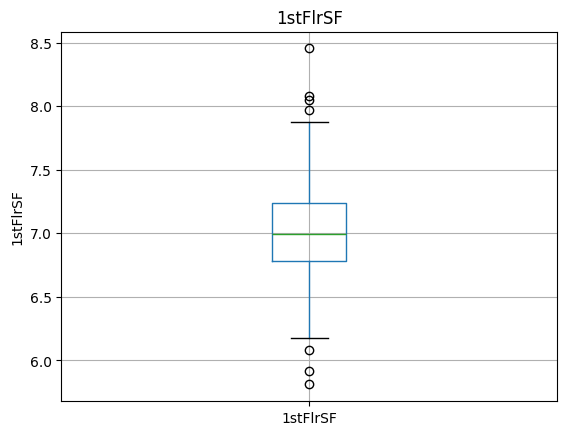

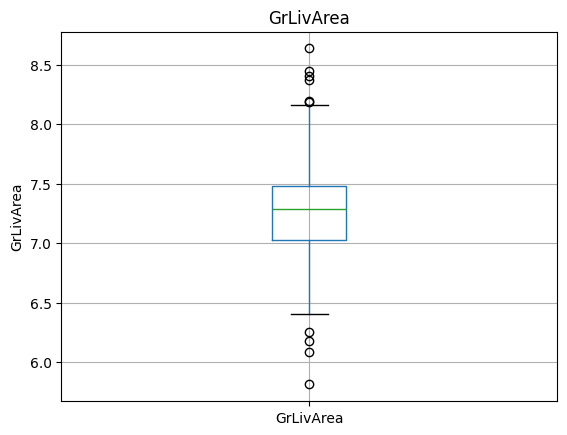

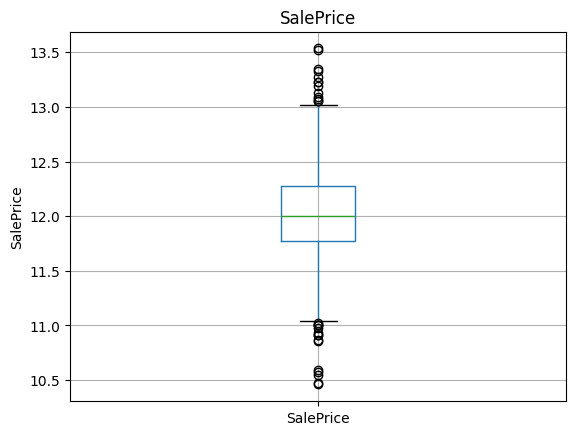

In [135]:
#Outliers- Any out of the place value
for f in continuous_features:
    data=dataset.copy()
    if 0 in data[f].unique():
        pass
    else:
        data[f]=np.log(data[f])
        data.boxplot(column=f)
        plt.ylabel(f)
        plt.title(f)
        plt.show()
    

In [136]:
#Categorical variables
categorical_features=[f for f in dataset.columns if dataset[f].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [137]:
dataset[categorical_features].head(2)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal

In [138]:
for f in categorical_features:
    print("The feature is {} and number of features is {}".format(f, len(dataset[f].unique())))

The feature is MSZoning and number of features is 5
The feature is Street and number of features is 2
The feature is Alley and number of features is 3
The feature is LotShape and number of features is 4
The feature is LandContour and number of features is 4
The feature is Utilities and number of features is 2
The feature is LotConfig and number of features is 5
The feature is LandSlope and number of features is 3
The feature is Neighborhood and number of features is 25
The feature is Condition1 and number of features is 9
The feature is Condition2 and number of features is 8
The feature is BldgType and number of features is 5
The feature is HouseStyle and number of features is 8
The feature is RoofStyle and number of features is 6
The feature is RoofMatl and number of features is 8
The feature is Exterior1st and number of features is 15
The feature is Exterior2nd and number of features is 16
The feature is MasVnrType and number of features is 4
The feature is ExterQual and number of fe

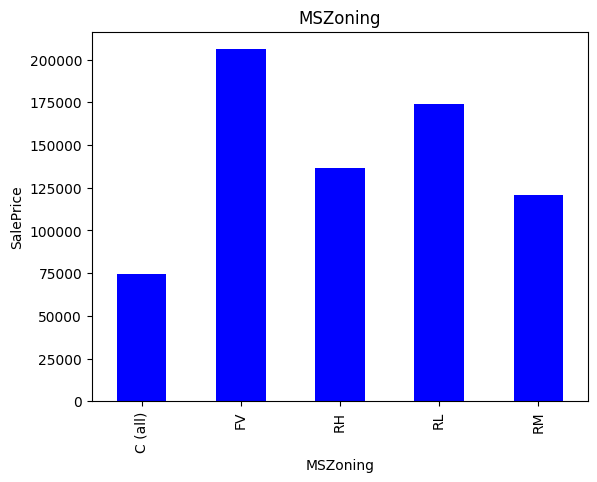

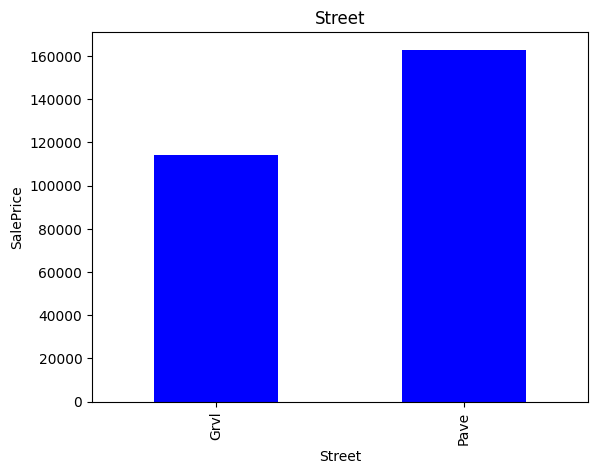

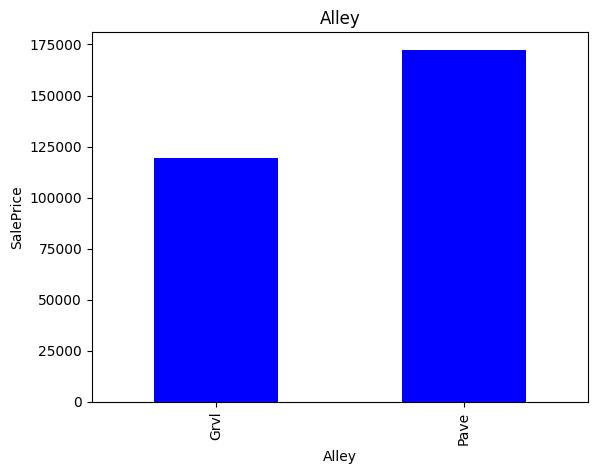

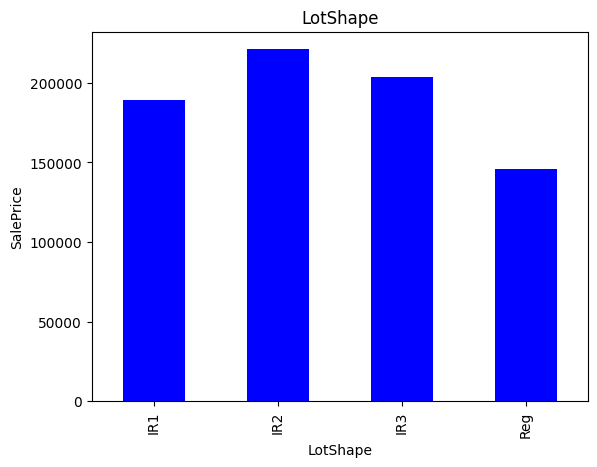

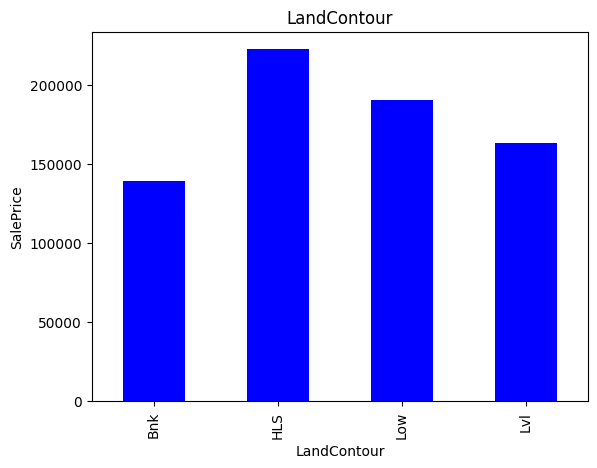

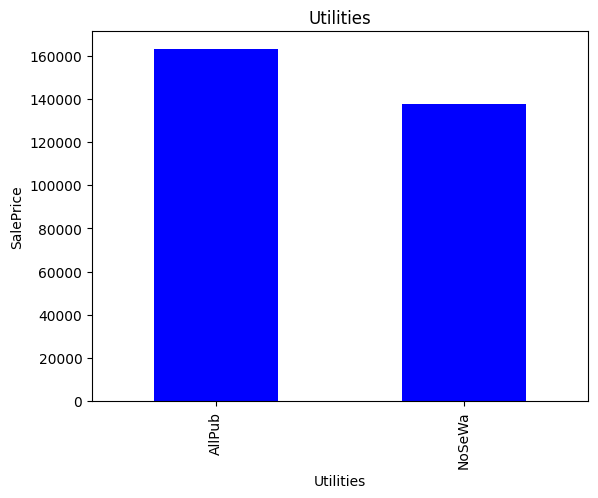

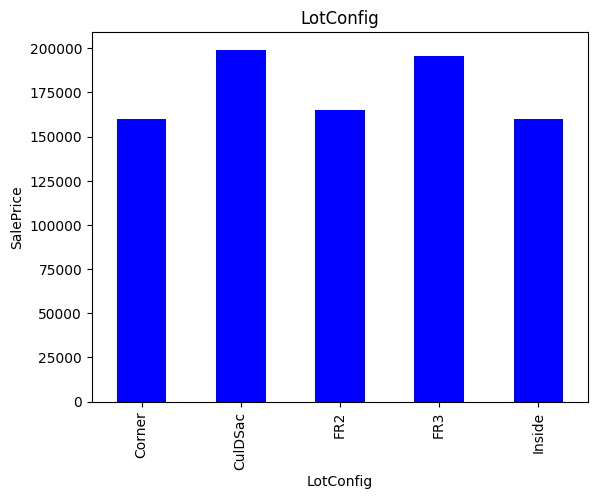

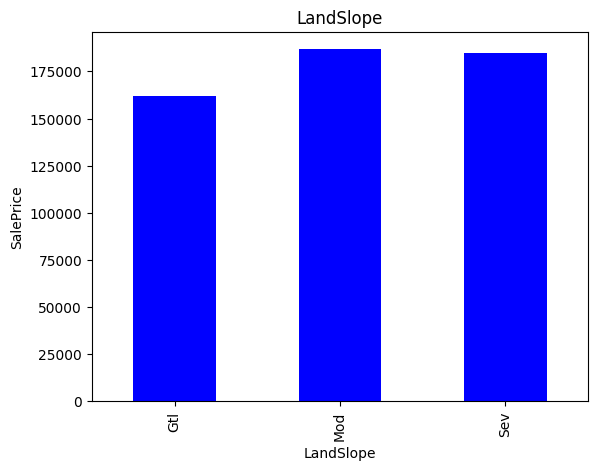

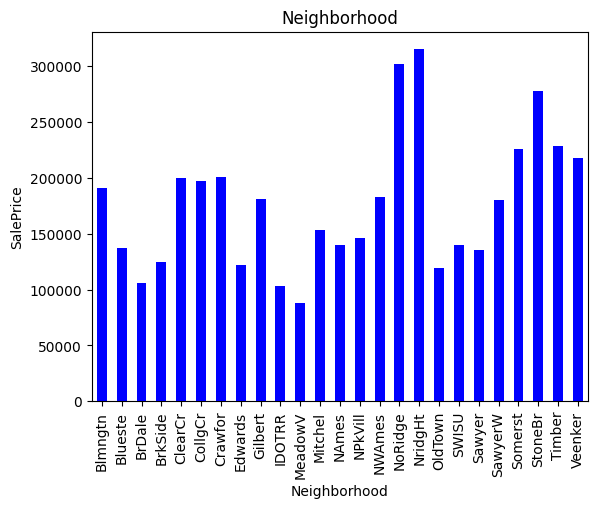

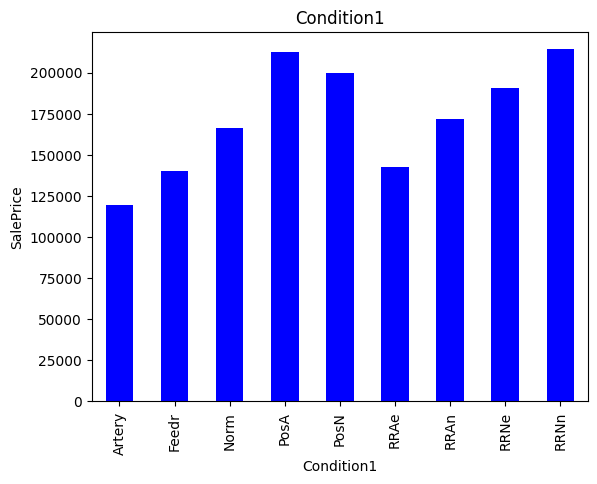

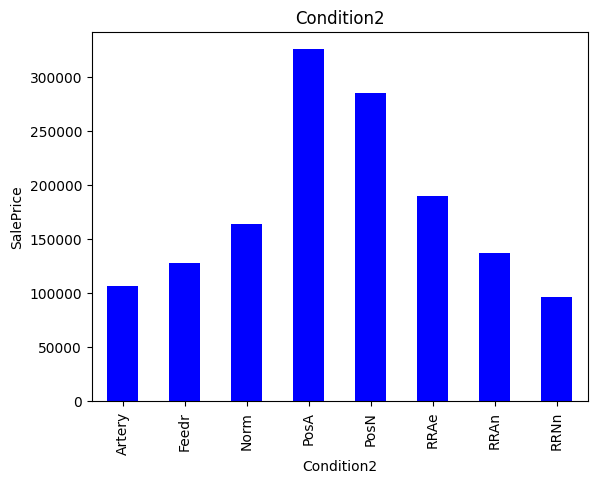

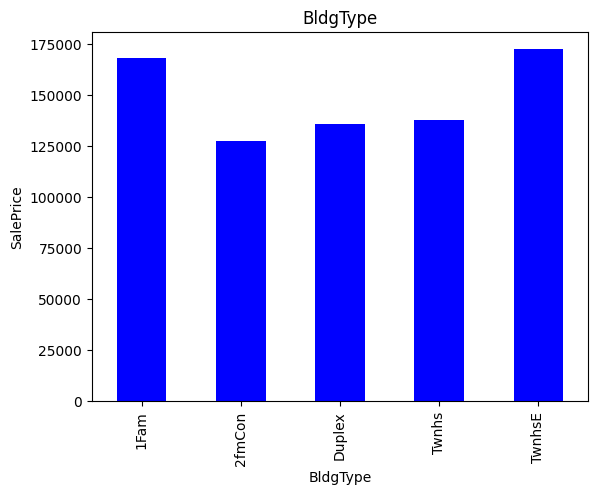

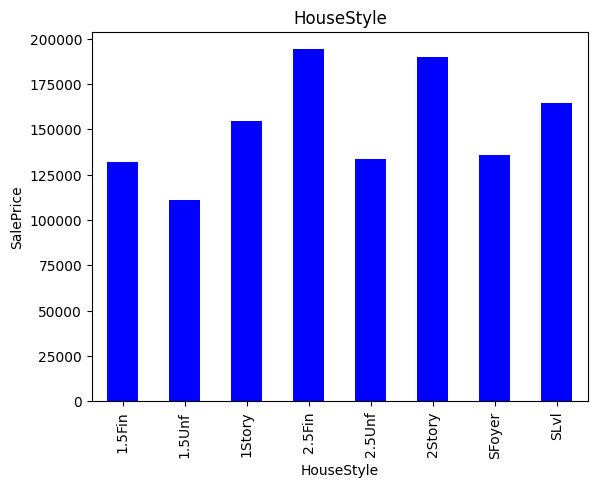

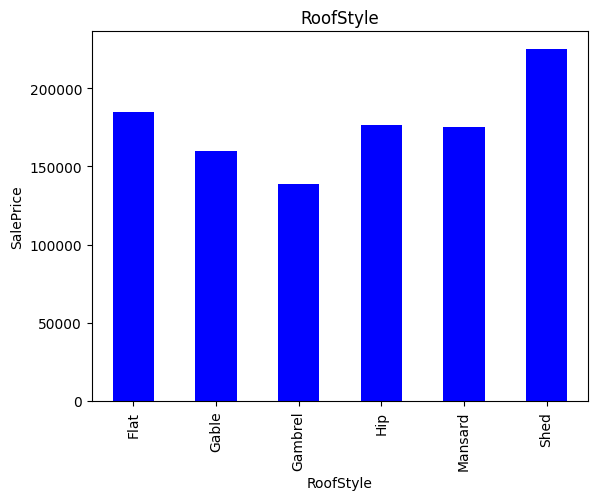

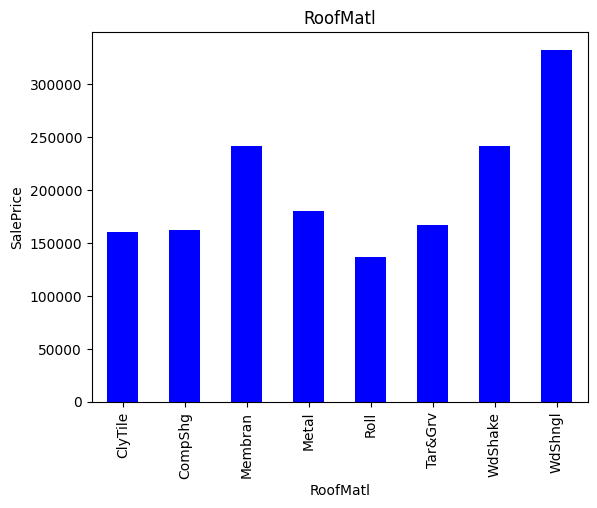

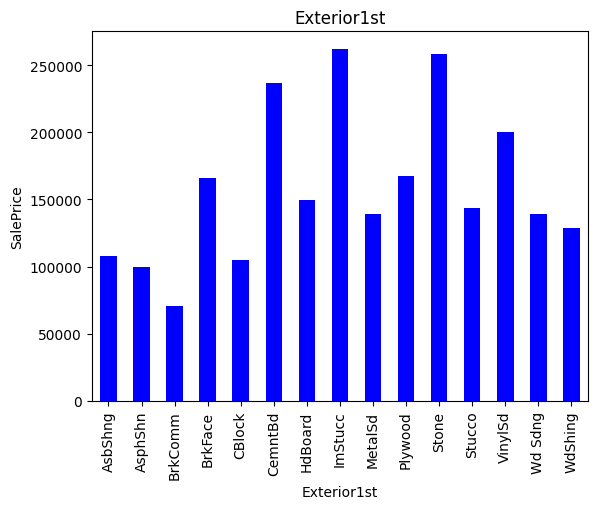

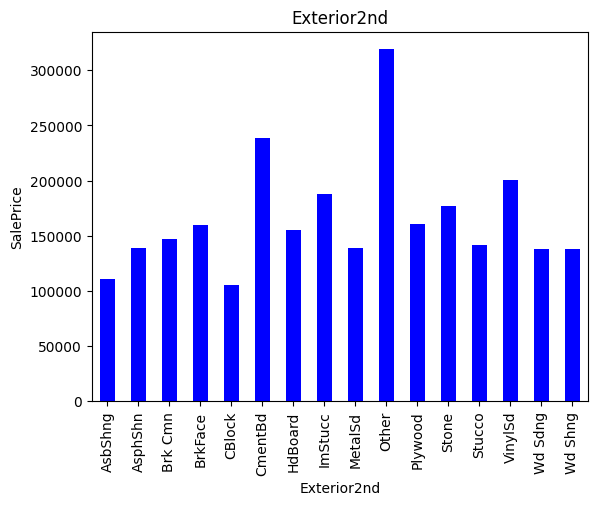

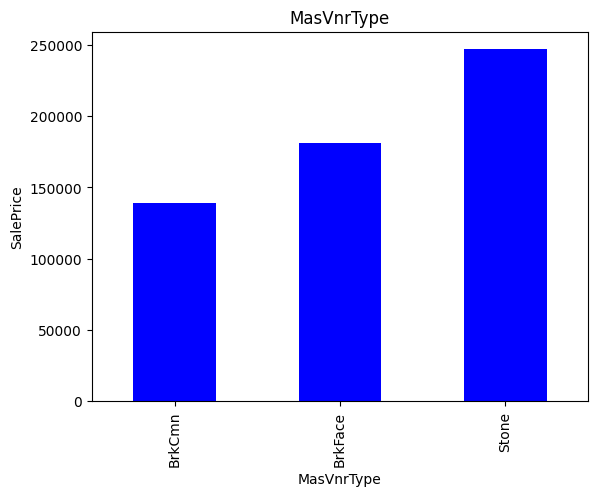

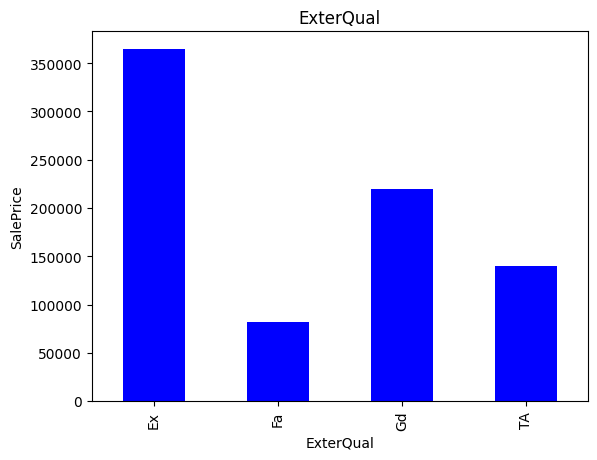

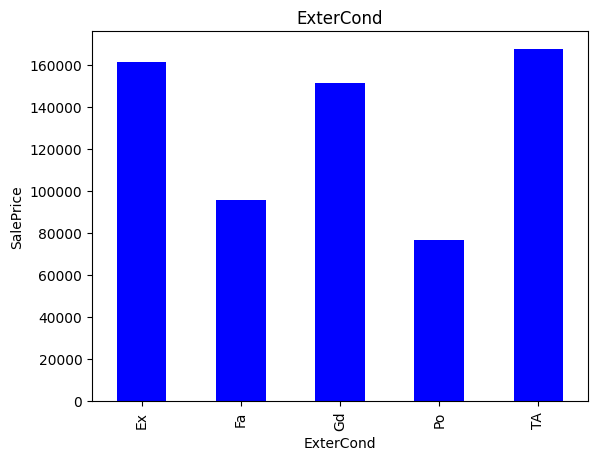

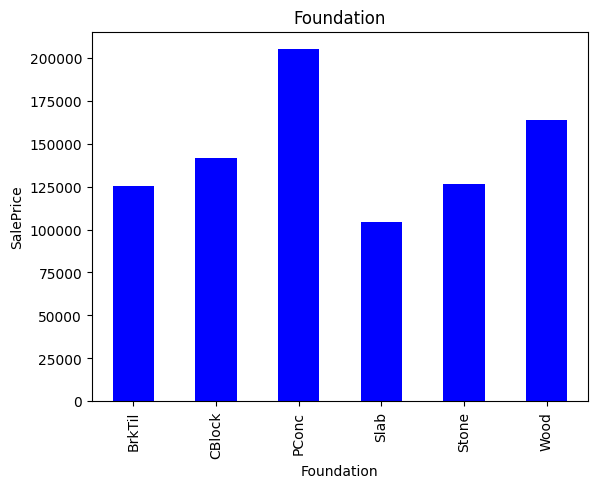

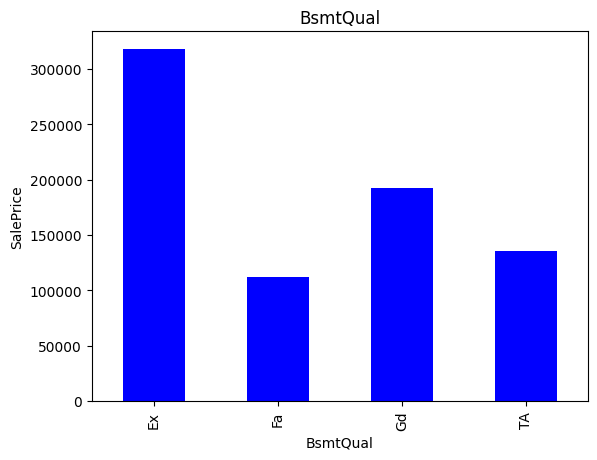

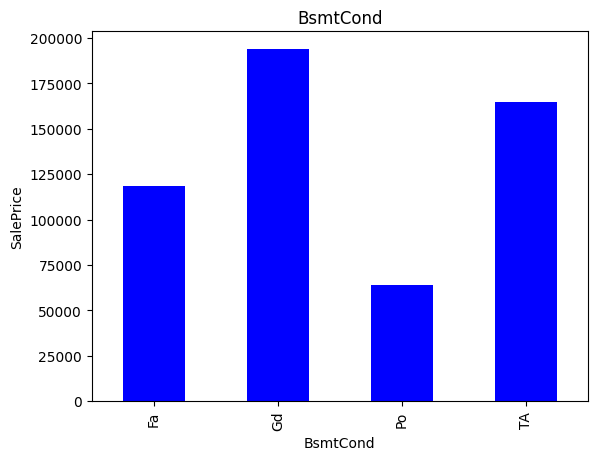

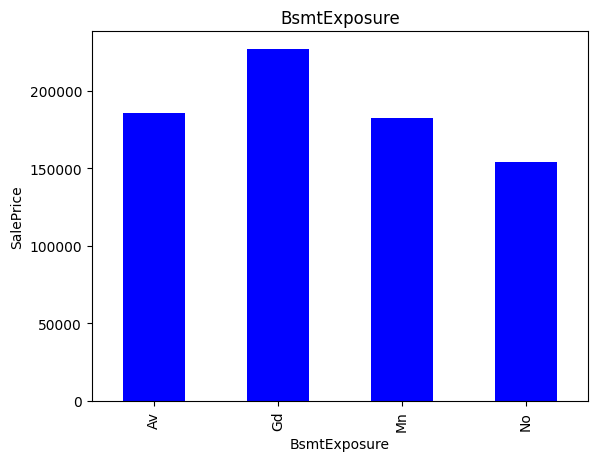

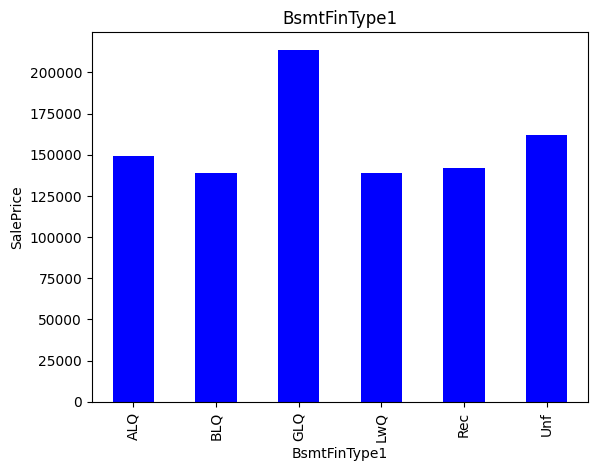

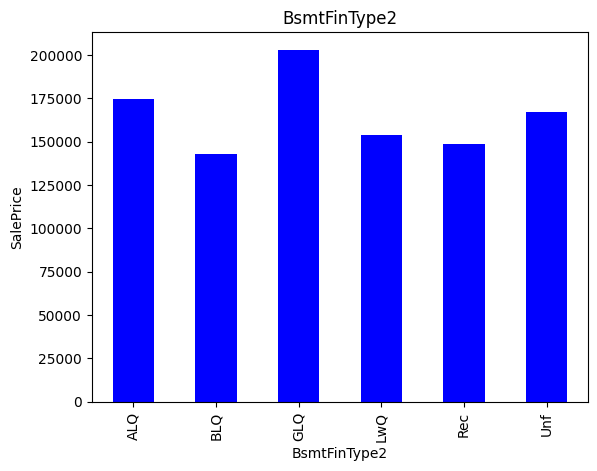

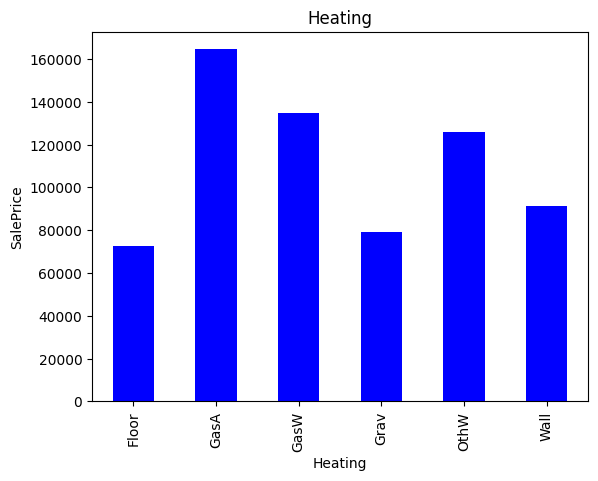

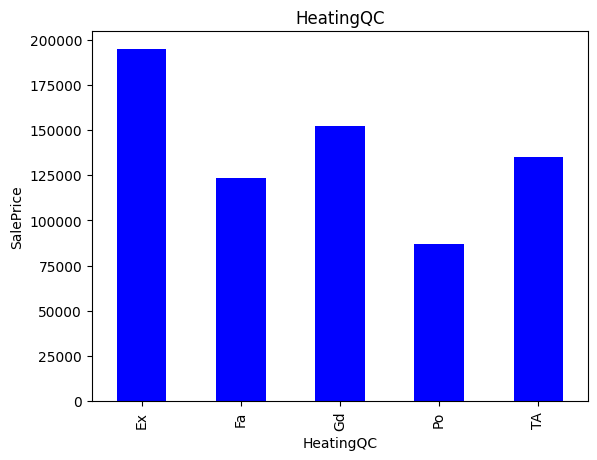

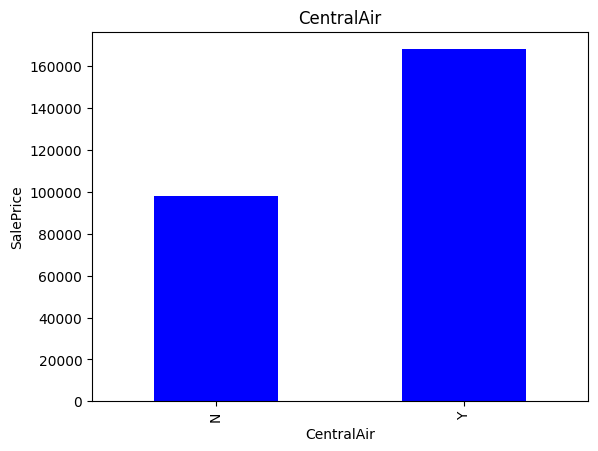

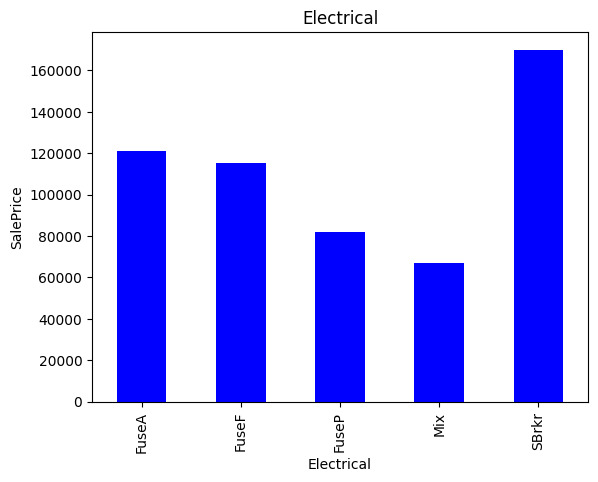

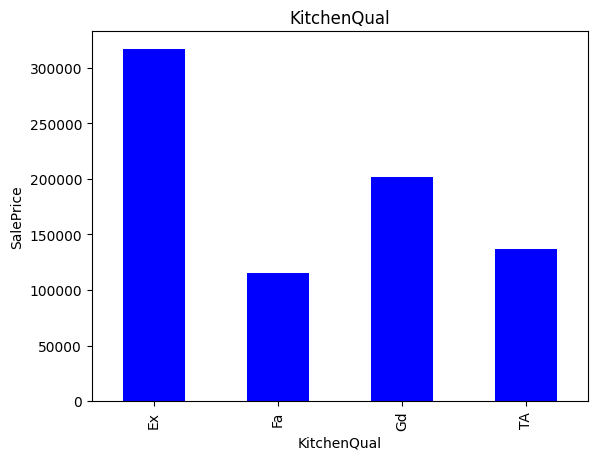

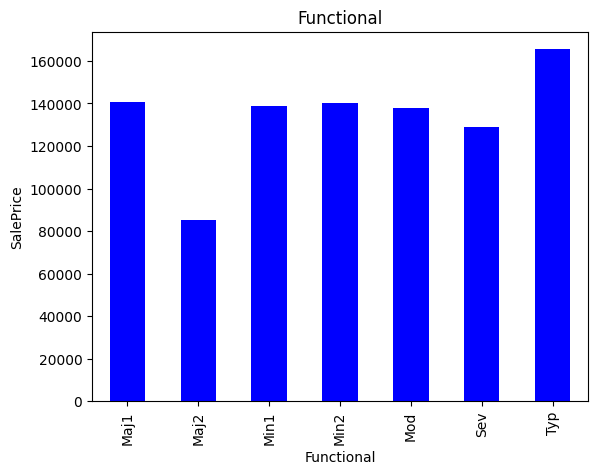

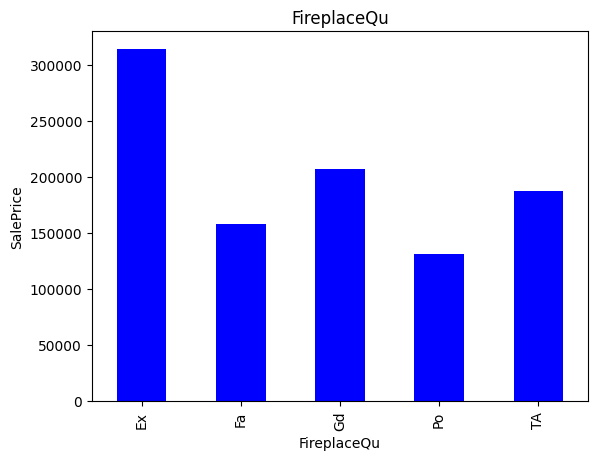

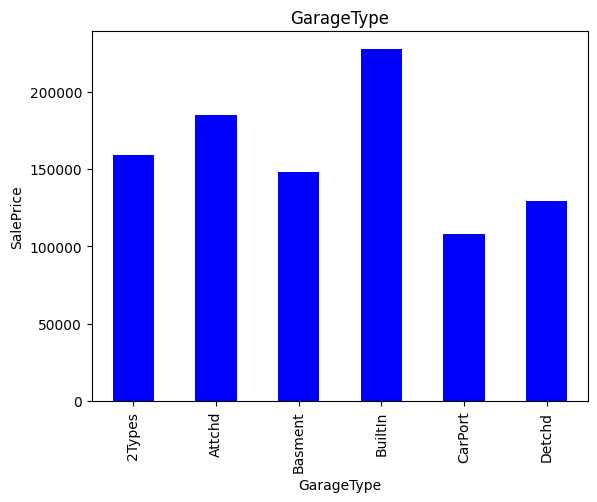

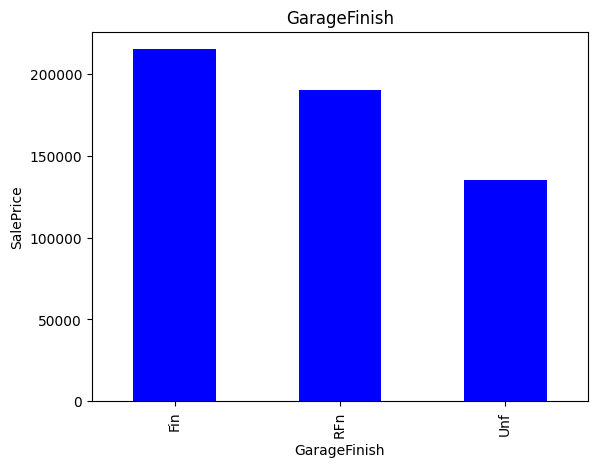

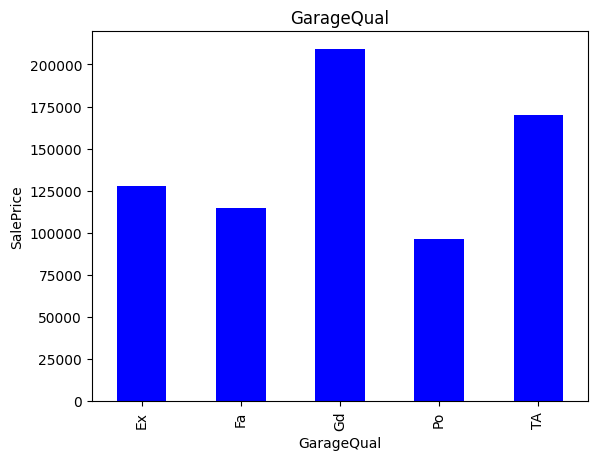

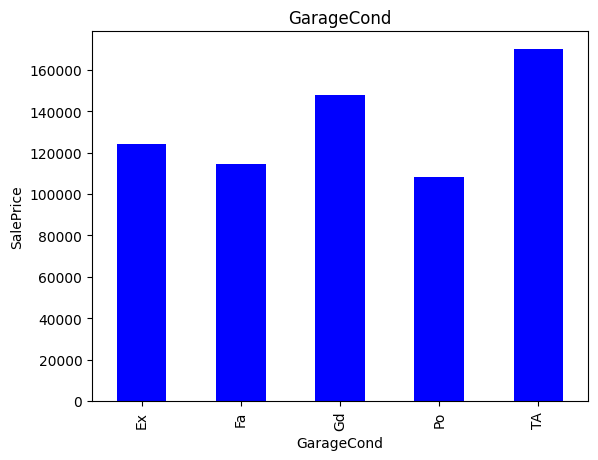

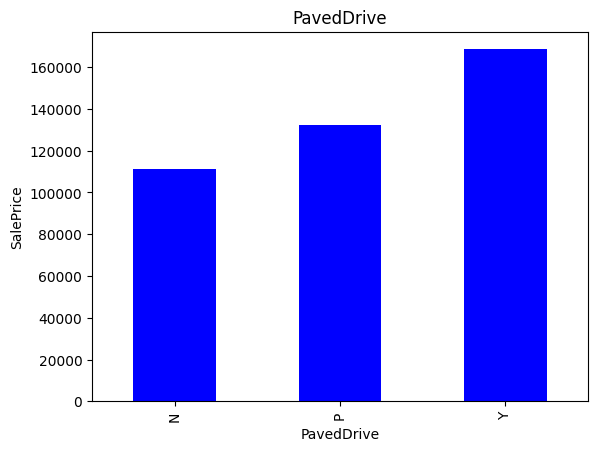

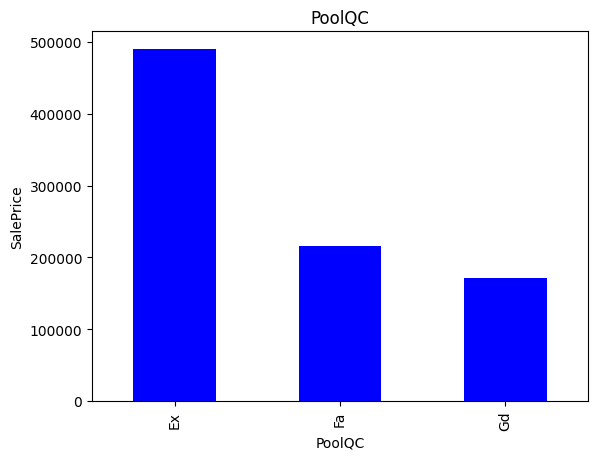

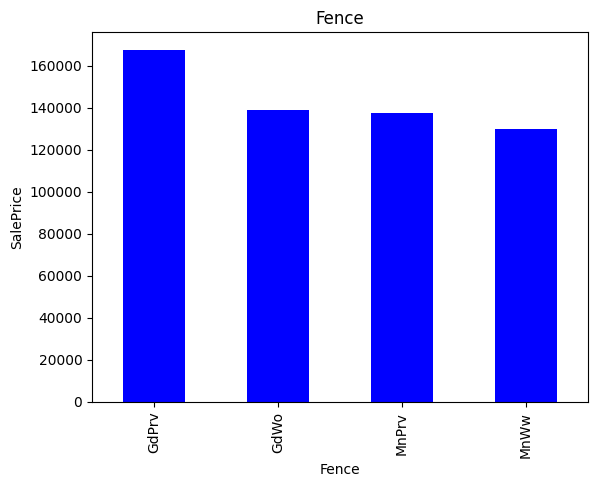

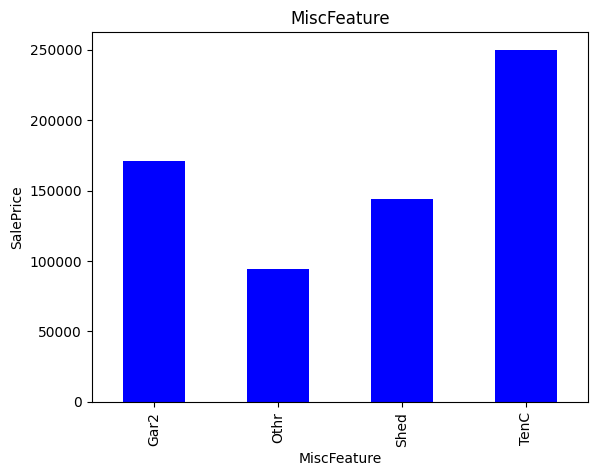

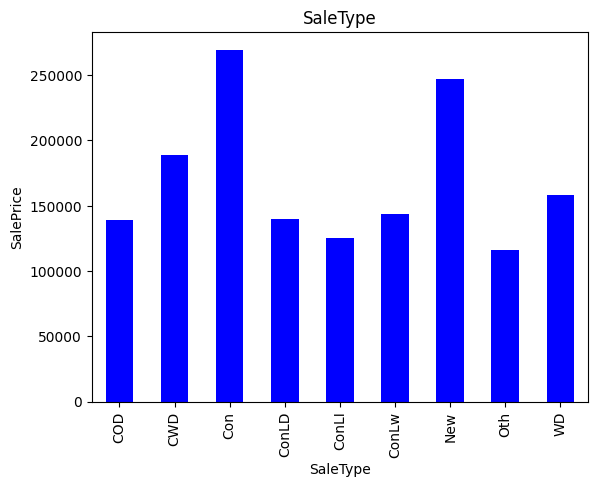

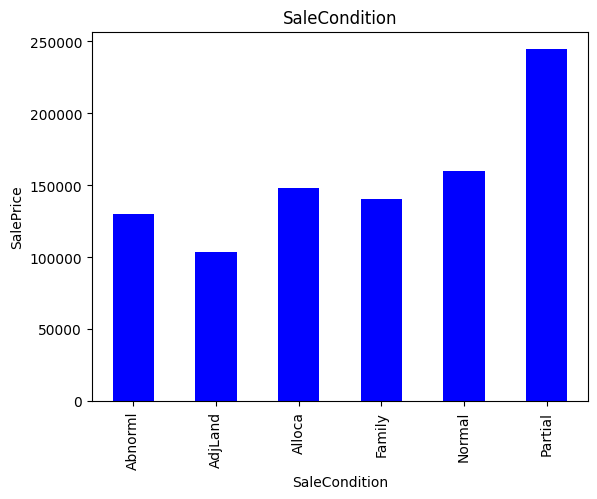

In [139]:
#Relationship between categorical features and SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=('Blue'))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [140]:
#FEATURE ENGINEERING
#ALWAYS REMEMBER THAT THERE CAN BE SOME DATA LEAKAGE SO IT IS IMPORTANT TO APPLY TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dataset, dataset['SalePrice'], test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [141]:
#Handling catergorical values
for f in categorical_features:
    if dataset[f].isnull().sum()>0:
        print(f,":", np.round(dataset[f].isnull().mean(), 4))

Alley : 0.9377
MasVnrType : 0.5973
BsmtQual : 0.0253
BsmtCond : 0.0253
BsmtExposure : 0.026
BsmtFinType1 : 0.0253
BsmtFinType2 : 0.026
Electrical : 0.0007
FireplaceQu : 0.4726
GarageType : 0.0555
GarageFinish : 0.0555
GarageQual : 0.0555
GarageCond : 0.0555
PoolQC : 0.9952
Fence : 0.8075
MiscFeature : 0.963


In [142]:
#Filling missing categorical values
categorical_na=[f for f in categorical_features if dataset[f].isnull().sum()>0]
dataset[categorical_na]=dataset[categorical_na].fillna("Missing")
dataset[categorical_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [143]:
#Handling missing numerical values
numerical_na=[f for f in numerical_features if dataset[f].isnull().sum()>0]
numerical_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [144]:
for f in numerical_na:
    print(f, np.round(dataset[f].isnull().mean(), 4))

LotFrontage 0.1774
MasVnrArea 0.0055
GarageYrBlt 0.0555


In [145]:
for feature in numerical_na:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [146]:
dataset.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

In [147]:
#handling temporal variables
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:  
    dataset[feature]=dataset['YrSold']-dataset[feature]
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head(5)
    

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [148]:
#Log Normal transformation of numerical variables
#Consider the features with non zero values and have skewed values
dataset[numerical_features].head(10)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5          5   
1   2          20         80.0     9600            6            8         31   
2   3          60         68.0    11250            7            5          7   
3   4          70         60.0     9550            7            5         91   
4   5          60         84.0    14260            8            5          8   
5   6          50         85.0    14115            5            5         16   
6   7          20         75.0    10084            8            5          3   
7   8          60         69.0    10382            7            6         36   
8   9          50         51.0     6120            7            5         77   
9  10         190         50.0     7420            5            6         69   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5       196.0         706           0        150          856   
1            31         0.0         978           0        284         1262   
2             6       162.0         486           0        434          920   
3            36         0.0         216           0        540          756   
4             8       350.0         655           0        490         1145   
5            14         0.0         732           0         64          796   
6             2       186.0        1369           0        317         1686   
7            36       240.0         859          32        216         1107   
8            58         0.0           0           0        952          952   
9            58         0.0         851           0        140          991   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   
5       796       566             0       1362             1             0   
6      1694         0             0       1694             1             0   
7      1107       983             0       2090             1             0   
8      1022       752             0       1774             0             0   
9      1077         0             0       1077             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   
5         1         1             1             1             5           0   
6         2         0             3             1             7           1   
7         2         1             3             1             7           2   
8         2         0             2             2             8           2   
9         1         0             2             2             5           2   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          5.0           2         548           0           61   
1         31.0           2         460         298            0   
2          7.0           2         608           0           42   
3          8.0           3         642           0           35   
4          8.0           3         836         192           84   
5         16.0           2         480          40           30   
6          3.0           2         636         255    

In [149]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for f in num_features:
    dataset[f]=np.log(dataset[f])
dataset[num_features].head(5)

LotFrontage   LotArea  1stFlrSF  GrLivArea  SalePrice
0     4.174387  9.041922  6.752270   7.444249  12.247694
1     4.382027  9.169518  7.140453   7.140453  12.109011
2     4.219508  9.328123  6.824374   7.487734  12.317167
3     4.094345  9.164296  6.867974   7.448334  11.849398
4     4.430817  9.565214  7.043160   7.695303  12.429216

In [150]:
#Handling rare categorical feature category
#Remove the category which is present less than 1 % of total observations
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    
dataset.head(50)

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    1          60        RL     4.174387  9.041922   Pave  Missing      Reg   
1    2          20        RL     4.382027  9.169518   Pave  Missing      Reg   
2    3          60        RL     4.219508  9.328123   Pave  Missing      IR1   
3    4          70        RL     4.094345  9.164296   Pave  Missing      IR1   
4    5          60        RL     4.430817  9.565214   Pave  Missing      IR1   
5    6          50        RL     4.442651  9.554993   Pave  Missing      IR1   
6    7          20        RL     4.317488  9.218705   Pave  Missing      Reg   
7    8          60        RL     4.234107  9.247829   Pave  Missing      IR1   
8    9          50        RM     3.931826  8.719317   Pave  Missing      Reg   
9   10         190        RL     3.912023  8.911934   Pave  Missing      Reg   
10  11          20        RL     4.248495  9.323669   Pave  Missing      Reg   
11  12          60        RL     4.442651  9.386308   Pave  Missing      IR1   
12  13          20        RL     4.234107  9.470240   Pave  Missing      IR2   
13  14          20        RL     4.510860  9.273503   Pave  Missing      IR1   
14  15          20        RL     4.234107  9.298351   Pave  Missing      IR1   
15  16          45        RM     3.931826  8.719317   Pave  Missing      Reg   
16  17          20        RL     4.234107  9.327323   Pave  Missing      IR1   
17  18          90        RL     4.276666  9.286468   Pave  Missing      Reg   
18  19          20        RL     4.189655  9.524786   Pave  Missing      Reg   
19  20          20        RL     4.248495  8.930626   Pave  Missing      Reg   
20  21          60        RL     4.615121  9.562053   Pave  Missing      IR1   
21  22          45        RM     4.043051  8.915835   Pave     Grvl      Reg   
22  23          20        RL     4.317488  9.184202   Pave  Missing      Reg   
23  24         120        RM     3.784190  8.348538   Pave  Missing      Reg   
24  25          20        RL     4.234107  9.017484   Pave  Missing      IR1   
25  26          20        RL     4.700480  9.563108   Pave  Missing      Reg   
26  27          20        RL     4.094345  8.881836   Pave  Missing      Reg   
27  28          20        RL     4.584967  9.348187   Pave  Missing      Reg   
28  29          20        RL     3.850148  9.700208   Pave  Missing      IR1   
29  30          30        RM     4.094345  8.752107   Pave  Missing      IR1   
30  31          70  Rare_var     3.912023  9.047821   Pave     Pave      Reg   
31  32          20        RL     4.234107  9.052985   Pave  Missing      IR1   
32  33          20        RL     4.442651  9.310095   Pave  Missing      Reg   
33  34          20        RL     4.248495  9.264071   Pave  Missing      IR1   
34  35         120        RL     4.094345  8.897409   Pave  Missing      Reg   
35  36          60        RL     4.682131  9.504352   Pave  Missing      Reg   
36  37          20        RL     4.718499  9.292750   Pave  Missing      Reg   
37  38          20        RL     4.304065  9.051579   Pave  Missing      Reg   
38  39          20        RL     4.219508  8.977399   Pave  Missing      Reg   
39  40          90        RL     4.174387  8.706159   Pave  Missing      Reg   
40  41          20        RL     4.430817  9.066239   Pave  Missing      Reg   
41  42          20        RL     4.744932  9.735365   Pave  Missing      Reg   
42  43          85        RL     4.234107  9.124782   Pave  Missing      IR1   
43  44          20        RL     4.234107  9.126959   Pave  Missing      IR1   
44  45          20        RL     4.248495  8.980298   Pave  Missing      Reg   
45  46         120        RL     4.110874  8.943506   Pave  Missing      Reg   
46  47          50        RL     3.871201  9.458918   Pave  Missing      IR1   
47  48          20        FV     4.430817  9.314340   Pave  Missing      Reg   
48  49         190        RM     3.496508  8.402007   Pave  Missing      Reg   
49  

In [151]:
#categorical feature encoding
#transformation into numerical values based on mean SalePrice
for f in categorical_features:
    labels_ordered=dataset.groupby(f)['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i, k in enumerate(labels_ordered, 0)}
    dataset[f]=dataset[f].map(labels_ordered)
dataset.head(5)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [152]:
#Feature Scaling
feature_scaling=[f for f in dataset.columns if f not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler as mm
scaler=mm()
scaler.fit(dataset[feature_scaling])
scaler.transform(dataset[feature_scaling])


array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [153]:
data= pd.concat(
    [dataset[['Id', 'SalePrice']].reset_index(drop=True),
     pd.DataFrame(scaler.transform(dataset[feature_scaling]),
                  columns=feature_scaling)],axis=1)

In [154]:
data.to_csv('X_train.csv',index=False)

In [155]:
data.head(10)

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   
5   6  11.870600    0.176471      0.75     0.517503  0.466761     1.0    1.0   
6   7  12.634603    0.000000      0.75     0.471175  0.400943     1.0    1.0   
7   8  12.206073    0.235294      0.75     0.440313  0.406643     1.0    1.0   
8   9  11.774520    0.176471      0.25     0.328426  0.303205     1.0    1.0   
9  10  11.678440    1.000000      0.75     0.321097  0.340903     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   
5  0.333333     0.333333        1.0       0.00        0.0      0.409091   
6  0.000000     0.333333        1.0       0.00        0.0      0.818182   
7  0.333333     0.333333        1.0       0.25        0.0      0.545455   
8  0.000000     0.333333        1.0       0.00        0.0      0.181818   
9  0.000000     0.333333        1.0       0.25        0.0      0.136364   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   
5         0.4         1.0      0.75         0.2     0.444444        0.500   
6         0.4         1.0      0.75         0.6     0.777778        0.500   
7         1.0         1.0      0.75         1.0     0.666667        0.625   
8         0.0         1.0      0.75         0.2     0.666667        0.500   
9         0.0         0.0      0.00         0.4     0.444444        0.625   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   
5   0.117647      0.245902        0.0       0.0          1.0          1.0   
6   0.022059      0.049180        0.0       0.0          1.0          1.0   
7   0.264706      0.606557        0.0       0.0          0.6          0.5   
8   0.566176      0.967213        0.0       0.0          0.8          0.4   
9   0.507353      0.967213        0.0       0.0          0.4          0.3   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.666667     0.12250   0.666667        1.0        1.00      0.75   
1    0.333333     0.00000   0.333333        1.0        0.50      0.75   
2    0.666667     0.10125   0.666667        1.0        1.00      0.75   
3    0.333333     0.00000   0.333333        1.0        0.25      0.50   
4    0.666667     0.21875   0.666667        1.0        1.00      0.75   
5    0.333333     0.00000   0.333333        1.0        0.75      0.75   
6    1.000000     0.11625   0.666667        1.0        1.00      1.00   
7    1.000000   

In [215]:
#Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [217]:
df=pd.read_csv('X_train.csv')
df.head(5)

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.666667     0.12250   0.666667        1.0        1.00      0.75   
1    0.333333     0.00000   0.333333        1.0        0.50      0.75   
2    0.666667     0.10125   0.666667        1.0        1.00      0.75   
3    0.333333     0.00000   0.333333        1.0        0.25      0.50   
4    0.666667     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [221]:
y_train=df['SalePrice']
X_train=df.drop(['Id', 'SalePrice'], axis=1)


In [233]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [235]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [239]:
selected_features=X_train.columns[(feature_sel_model.get_support())]
selected_features

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [247]:
X_train.head()

MSSubClass  MSZoning  Neighborhood  OverallQual  YearRemodAdd  RoofStyle  \
0    0.235294      0.75      0.636364     0.666667      0.098361        0.0   
1    0.000000      0.75      0.500000     0.555556      0.524590        0.0   
2    0.235294      0.75      0.636364     0.666667      0.114754        0.0   
3    0.294118      0.75      0.727273     0.666667      0.606557        0.0   
4    0.235294      0.75      1.000000     0.777778      0.147541        0.0   

   BsmtQual  BsmtExposure  HeatingQC  CentralAir  1stFlrSF  GrLivArea  \
0      0.75          0.25       1.00         1.0  0.356155   0.577712   
1      0.75          1.00       1.00         1.0  0.503056   0.470245   
2      0.75          0.50       1.00         1.0  0.383441   0.593095   
3      0.50          0.25       0.75         1.0  0.399941   0.579157   
4      0.75          0.75       1.00         1.0  0.466237   0.666523   

   BsmtFullBath  KitchenQual  Fireplaces  FireplaceQu  GarageType  \
0      0.333333     0.666667    0.000000          0.2         0.8   
1      0.000000     0.333333    0.333333          0.6         0.8   
2      0.333333     0.666667    0.333333          0.6         0.8   
3      0.333333     0.666667    0.333333          0.8         0.4   
4      0.333333     0.666667    0.333333          0.6         0.8   

   GarageFinish  GarageCars  PavedDrive  SaleCondition  
0      0.666667        0.50         1.0           0.75  
1      0.666667        0.50         1.0           0.75  
2      0.666667        0.50         1.0           0.75  
3      0.333333        0.75         1.0           0.00  
4      0.666667        0.75         1.0           0.75